$\Huge Computational$ $\Huge Intelligence$ $\Huge Lab$

$\Huge  Assignment$ $\Huge 3$

---

Joanna Wójcicka, gr.2

---

# 3. Transformes

Transformers are a neural network architecture proposed in the paper “Attention Is All You Need” (Vaswani et al., 2017). They revolutionized natural language processing (NLP) and later found applications in other fields as well—computer vision, audio, biology, and time series analysis.

The operating principle of a Transformer is based on the attention mechanism, which allows the model to dynamically focus on the most relevant parts of the input data, instead of processing it sequentially like RNNs or LSTMs.


## 3.1 Transofrmers in NLP



### 3.1.1 General concept




#### **Preprocessing**
 * Tokenization
 * Converting sentences into sequences of integer numbers (words ids
 * Padding

$$
\textbf{I love this movie!}
\xrightarrow{\text{Preprocessing}}
[\texttt{[CLS]},\ id_{I}, id_{love}, id_{this}, id_{movie}, \texttt{[SEP]}]
$$


In [1]:
from tensorflow.keras import layers

pos_phrases = [
    "i love this movie", "what a great day", "amazing product highly recommend",
    "fantastic results very happy", "pleasant surprise exceeded expectations",
    "brilliant idea well executed", "superb quality", "wonderful experience",
    "happy with the outcome", "this is excellent"
]
neg_phrases = [
    "i hate this movie", "what a terrible day", "awful product do not buy",
    "disappointing results very unhappy", "bad idea poorly executed",
    "horrible quality", "worst experience", "sad with the outcome",
    "this is terrible", "completely unacceptable"
]

texts = pos_phrases + neg_phrases

max_len = 8
vectorizer = layers.TextVectorization(max_tokens=1000, output_sequence_length=max_len)
vectorizer.adapt(texts)

vocab_size = len(vectorizer.get_vocabulary())
print("Vocabulary size:", vocab_size)

print(vectorizer.get_vocabulary())

2025-11-10 14:00:15.543665: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-10 14:00:15.603510: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-10 14:00:16.990545: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


Vocabulary size: 50
['', '[UNK]', np.str_('this'), np.str_('with'), np.str_('what'), np.str_('very'), np.str_('the'), np.str_('terrible'), np.str_('results'), np.str_('quality'), np.str_('product'), np.str_('outcome'), np.str_('movie'), np.str_('is'), np.str_('idea'), np.str_('i'), np.str_('happy'), np.str_('experience'), np.str_('executed'), np.str_('day'), np.str_('a'), np.str_('worst'), np.str_('wonderful'), np.str_('well'), np.str_('unhappy'), np.str_('unacceptable'), np.str_('surprise'), np.str_('superb'), np.str_('sad'), np.str_('recommend'), np.str_('poorly'), np.str_('pleasant'), np.str_('not'), np.str_('love'), np.str_('horrible'), np.str_('highly'), np.str_('hate'), np.str_('great'), np.str_('fantastic'), np.str_('expectations'), np.str_('excellent'), np.str_('exceeded'), np.str_('do'), np.str_('disappointing'), np.str_('completely'), np.str_('buy'), np.str_('brilliant'), np.str_('bad'), np.str_('awful'), np.str_('amazing')]


I0000 00:00:1762779617.676050   65295 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9517 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


In [2]:
X = vectorizer(texts)
X.shape

TensorShape([20, 8])

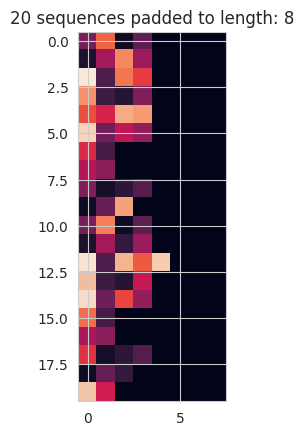

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X)
plt.title(f'{X.shape[0]} sequences padded to length: {X.shape[1]}')
plt.show()

vocabulary size: 50
{'<PAD>': 0, '<UNK>': 1, 'i': 2, 'love': 3, 'this': 4, 'movie': 5, 'what': 6, 'a': 7, 'great': 8, 'day': 9, 'amazing': 10, 'product': 11, 'highly': 12, 'recommend': 13, 'fantastic': 14, 'results': 15, 'very': 16, 'happy': 17, 'pleasant': 18, 'surprise': 19, 'exceeded': 20, 'expectations': 21, 'brilliant': 22, 'idea': 23, 'well': 24, 'executed': 25, 'superb': 26, 'quality': 27, 'wonderful': 28, 'experience': 29, 'with': 30, 'the': 31, 'outcome': 32, 'is': 33, 'excellent': 34, 'hate': 35, 'terrible': 36, 'awful': 37, 'do': 38, 'not': 39, 'buy': 40, 'disappointing': 41, 'unhappy': 42, 'bad': 43, 'poorly': 44, 'horrible': 45, 'worst': 46, 'sad': 47, 'completely': 48, 'unacceptable': 49}


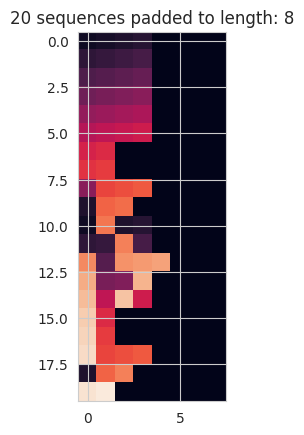

In [4]:
# for PyTorch

import torch

def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}
    for t in texts:
        for w in t.lower().split():
            if w not in vocab:
                vocab[w] = len(vocab)
    return vocab

def encode(text, vocab, max_len=8):
    tokens = [vocab.get(w, 1) for w in text.lower().split()]
    tokens = tokens[:max_len]
    return tokens + [0]*(max_len - len(tokens))

vocab = build_vocab(texts)

print(f"vocabulary size: {len(vocab)}")
print(vocab)

max_len = 8
X = torch.tensor([encode(t, vocab, max_len) for t in texts])

plt.imshow(X.detach().numpy())
plt.title(f'{X.shape[0]} sequences padded to length: {X.shape[1]}')
plt.show()


####  **Embedding and positional encoding**

Each token is represented as embedding vector (of selected length). Vectors are arranged into matrices.

$$
[\texttt{[CLS]},\ t_1, t_2, \ldots, t_n, \texttt{[SEP]}] \xrightarrow{\text{Embedding Layer}}
X = [\mathbf{x}_{\text{CLS}}, \mathbf{x}_1, \ldots, \mathbf{x}_n, \mathbf{x}_{\text{SEP}}]
$$

$$
\xrightarrow{+\ \text{Positional Encoding}}
Z = X + PE
$$

While embeddings store reprezentation of token values, positional encoding gives information on their position within the sentence (document).

$$
\begin{aligned}
PE_{\text{pos},\, 2i} &= \sin\!\left(\frac{\text{pos}}{10000^{\,2i/d_{\text{model}}}}\right) \\
PE_{\text{pos},\, 2i+1} &= \cos\!\left(\frac{\text{pos}}{10000^{\,2i/d_{\text{model}}}}\right)
\end{aligned}
$$

where $d_{\text{model}}$ is the embedding size, pos - a position within the sequence.

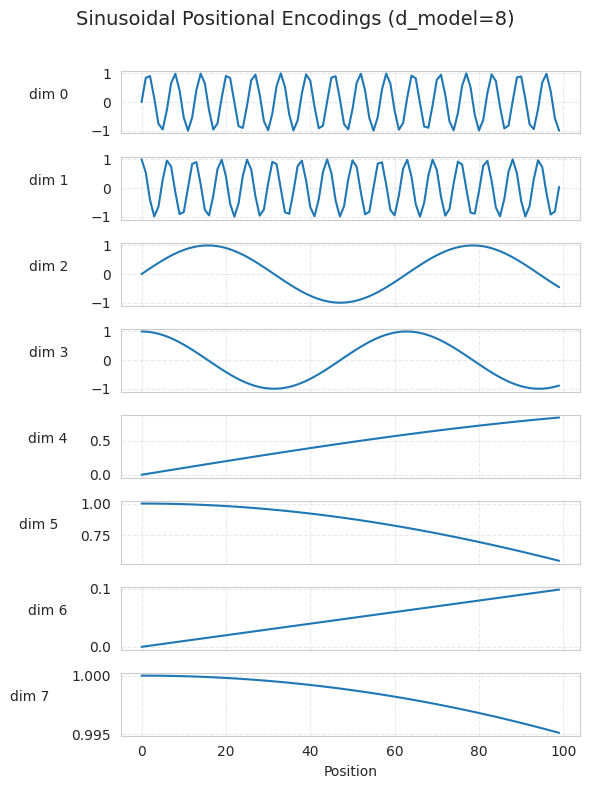

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    positions = np.arange(seq_len)[:, np.newaxis]          # shape (seq_len, 1)
    dimensions = np.arange(d_model)[np.newaxis, :]         # shape (1, d_model)
    angle_rates = 1 / np.power(10000, (2 * (dimensions // 2)) / np.float32(d_model))
    angle_rads = positions * angle_rates

    # Apply sin to even indices, cos to odd indices
    pos_encoding = np.zeros_like(angle_rads)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])

    return pos_encoding

# Example parameters
seq_len = 100
d_model = 8

pos_encoding = positional_encoding(seq_len, d_model)

# Plot
fig, axes = plt.subplots(d_model, 1, figsize=(6, d_model), sharex=True)

for i, ax in enumerate(axes):
    ax.plot(pos_encoding[:, i])
    ax.set_ylabel(f"dim {i}", rotation=0, labelpad=30, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.4)

axes[-1].set_xlabel("Position")
fig.suptitle(f"Sinusoidal Positional Encodings (d_model={d_model})", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Distances between positional encodings of neighboring positions

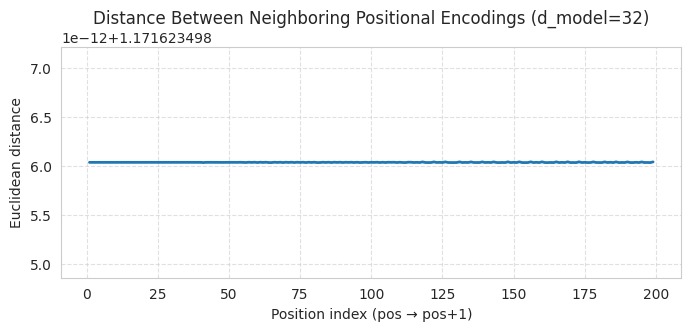

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(seq_len, d_model):
    positions = np.arange(seq_len)[:, np.newaxis]  # (seq_len, 1)
    i = np.arange(d_model)[np.newaxis, :]          # (1, d_model)
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    angle_rads = positions * angle_rates

    pos_encoding = np.zeros_like(angle_rads)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return pos_encoding

# Parameters
seq_len = 200
d_model = 32

# Compute positional encodings
pos_encoding = positional_encoding(seq_len, d_model)

# Compute Euclidean distances between neighboring encodings
diffs = np.diff(pos_encoding, axis=0)
distances = np.linalg.norm(diffs, axis=1)

# Plot
plt.figure(figsize=(8, 3))
plt.plot(np.arange(1, seq_len), distances, lw=2)
plt.title(f"Distance Between Neighboring Positional Encodings (d_model={d_model})")
plt.xlabel("Position index (pos → pos+1)")
plt.ylabel("Euclidean distance")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()



* Neighboring positions are not identical, but they’re close — roughly 1.1-1.3 units apart in a high-dimensional space.

* This gives the model a smooth positional gradient, while still keeping positions distinct.

#### **Transformer block**
In the next step $Z = X + PE$ (a matrix, which columns are sums of embeddings and positional encoding) is supplied to the transformer block.
$$
Z \xrightarrow{\text{Transformer Encoder Stack (}\times N\text{)}}
$$

$$
\begin{cases}
Q = ZW_Q, \quad K = ZW_K, \quad V = ZW_V \\[6pt]
\text{Attention}(Q,K,V) =
\text{softmax}\!\left(\dfrac{QK^\top}{\sqrt{d_k}}\right)V \\[6pt]
\text{Add & LayerNorm} \\[4pt]
\text{FeedForward: } \text{ReLU}(xW_1 + b_1)W_2 + b_2 \\[4pt]
\text{Add & LayerNorm}
\end{cases}
$$



The most importan element is the *Attention* layer.
For each position in a sequence (e.g., each word in a sentence), a Transformer computes three vectors:
* $Q=ZW_Q$ - query:  *What am I trying to attend to?*
* $K=ZW_K$ - key: *What does this element represent?*
* $V=ZW_V$ - value: *What information do I carry?*

The attention score between two elements is computed as the dot product of the Query and the Key:

$$score(i,j) = Q_i \cdot K_j$$

This score determines how much element $i$ should pay attention to element $j$
After applying softmax, these scores are used to compute a weighted sum of the Values $V$, producing the output of the attention mechanism.

Multi-head attention is an extension of the standard attention mechanism in Transformers. Instead of computing a single attention map, the model uses multiple “heads,” each with its own set of Query, Key, and Value projections. Each head can focus on different aspects of the sequence simultaneously — for example, one head might capture syntactic relationships while another captures semantic dependencies.

#### **Attention map example**

Attention weights shape: torch.Size([1, 1, 4, 4])


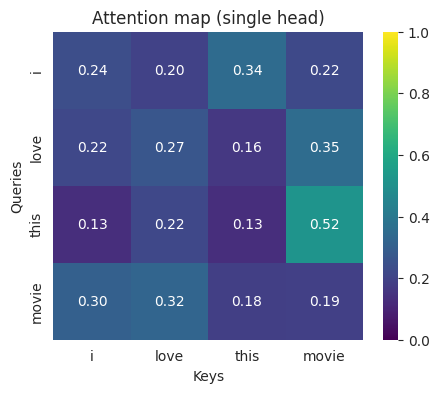

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# === Input data ===
vocab = {"<PAD>":0, "<UNK>":1, "i":2, "love":3, "this":4, "movie":5}
max_len = 4

def encode(text):
    tokens = [vocab.get(w, 1) for w in text.lower().split()]
    tokens = tokens[:max_len]
    return tokens + [0]*(max_len - len(tokens))

sentence = "i love this movie"
words = sentence.split()

x = torch.tensor([encode(sentence)], dtype=torch.long)  # shape: (1, seq_len)

# === Embeddings (random) ===
embed_dim = 8
seq_len = x.shape[1]
vocab_size = 10
embed_dim = 128
num_heads = 1

embedding = nn.Embedding(vocab_size, embed_dim)
x = torch.arange(seq_len) % vocab_size  # [0,1,2,3]
x = embedding(x).unsqueeze(1)  # (seq_len, batch, embed_dim)

# === Multi-head attention ===
multihead_attn = nn.MultiheadAttention(embed_dim=embed_dim, num_heads=num_heads, batch_first=False)

# Self-attention: query, key, value = x
attn_output, attn_weights = multihead_attn(x, x, x, need_weights=True, average_attn_weights=False)

print("Attention weights shape:", attn_weights.shape)
# -> (num_heads, batch, seq_len, seq_len)

# === Visualization of attention map ===
attn_maps = attn_weights.squeeze(1).detach().numpy().reshape(num_heads,4,4)  # (num_heads, seq_len, seq_len)


if num_heads==1:
  fig, ax = plt.subplots(figsize=(5, 4))
  sns.heatmap(attn_maps[0], vmin=0, vmax=1, cmap="viridis",
              xticklabels=words, yticklabels=words,annot=True, fmt=".2f", ax=ax)
  ax.set_title("Attention map (single head)")
  ax.set_xlabel("Keys")
  ax.set_ylabel("Queries")
else:
  fig, axes = plt.subplots(1, num_heads, figsize=(4*num_heads+1, 4))
  for i, ax in enumerate(axes):
      sns.heatmap(attn_maps[i], vmin=0, vmax=1, cmap="viridis",
                  xticklabels=words, yticklabels=words,annot=True, fmt=".2f", ax=ax)
      ax.set_title(f"Head {i+1}")
      ax.set_xlabel("Keys")
      ax.set_ylabel("Queries")

  plt.tight_layout()
plt.show()


#### **Classification**

Transformer block returns a sequence of hidden states:
$$
H_{\text{enc}} = [\mathbf{h}_{\text{CLS}}, \mathbf{h}_1, \ldots, \mathbf{h}_n, \mathbf{h}_{\text{SEP}}]
$$

Depending on the architecture:
* Only the first vector $\mathbf{h}_{\text{CLS}}$ is furher used in classification.
* Or classification is based on all or averaged values of $\mathbf{h}_1, \ldots, \mathbf{h}_n$


**The next steps (classification)**:
$$
\xrightarrow{}
H_{\text{enc}} = [\mathbf{h}_{\text{CLS}}, \mathbf{h}_1, \ldots, \mathbf{h}_n, \mathbf{h}_{\text{SEP}}]
$$

$$
\xrightarrow{\text{Take } \mathbf{h}_{\text{CLS}}}
\mathbf{h}_{\text{out}} = \mathbf{h}_{\text{CLS}} \in \mathbb{R}^{d_{\text{model}}}
$$

$$\text{or}$$

$$
\xrightarrow{\text{Take } \mathbf{h}_1, \ldots, \mathbf{h}_n}
\mathbf{h}_{\text{out}} = \text{Mean}(\mathbf{h}_1, \ldots, \mathbf{h}_n)
$$

$$
\xrightarrow{\text{Classification Head (Dense Layer)}}
\text{logits} = \mathbf{h}_{\text{out}} W_c + b_c
$$

$$
\xrightarrow{\text{Softmax}}
P(y \mid X) = \text{softmax}(\text{logits})
$$

$$
\xrightarrow{\text{Loss (categorical crossentropy)}}
\mathcal{L} = - \sum_{c=1}^{C} \mathbf{1}(y = c) \, \log P(y_c \mid X)
$$



### 3.1.2 Tiny example

#### Tensorflow

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# --- Dane ---
pos_phrases = [
    "i love this movie", "what a great day", "amazing product highly recommend",
    "fantastic results very happy", "pleasant surprise exceeded expectations",
    "brilliant idea well executed", "superb quality", "wonderful experience",
    "happy with the outcome", "this is excellent"
]
neg_phrases = [
    "i hate this movie", "what a terrible day", "awful product do not buy",
    "disappointing results very unhappy", "bad idea poorly executed",
    "horrible quality", "worst experience", "sad with the outcome",
    "this is terrible", "completely unacceptable"
]

texts = pos_phrases + neg_phrases
labels = [1]*len(pos_phrases) + [0]*len(neg_phrases)

# --- Tokenizacja ---
max_len = 8
vectorizer = layers.TextVectorization(max_tokens=1000, output_sequence_length=max_len)
vectorizer.adapt(texts)

vocab_size = len(vectorizer.get_vocabulary())
print("Vocabulary size:", vocab_size)


# --- Funkcja positional encoding ---
def positional_encoding(max_len, d_model):
    positions = np.arange(max_len)[:, np.newaxis]
    dims = np.arange(d_model)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (dims // 2)) / np.float32(d_model))
    angle_rads = positions * angle_rates

    pos_encoding = np.zeros_like(angle_rads)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return tf.cast(pos_encoding[np.newaxis, ...], dtype=tf.float32)


# --- Blok Transformer (1 warstwa) ---
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation="relu"),
            layers.Dense(embed_dim)
        ])
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training=None):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.norm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.norm2(out1 + ffn_output)


# --- Model ---
embed_dim = 32
num_heads = 2
ff_dim = 64

inputs = keras.Input(shape=(max_len,), dtype=tf.int64)
x = layers.Embedding(vocab_size, embed_dim)(inputs)

# Dodanie positional encoding
pos_encoding = positional_encoding(max_len, embed_dim)
x = x + pos_encoding

# Blok Transformer
x = TransformerBlock(embed_dim, num_heads, ff_dim)(x)
x = layers.GlobalAveragePooling1D()(x) # no class token
x = layers.Dropout(0.1)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, x)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# --- Trening ---
X = vectorizer(texts)
y = tf.constant(labels, dtype=tf.float32)

history = model.fit(X, y, epochs=35, batch_size=4, verbose=0)

# --- Test ---
test_phrases = [
    "i really love this product",
    "this is horrible",
    "fantastic quality and great idea",
    "disappointing and bad",
    "wonderful surprise",
    "completely bad experience"
]

test_X = vectorizer(test_phrases)
preds = model.predict(test_X)

for phrase, p in zip(test_phrases, preds):
    print(f"{phrase:45s} → sentiment: {'positive' if p[0]>0.5 else 'negative'} ({p[0]:.2f})")


Vocabulary size: 50


2025-11-10 14:00:21.622226: I external/local_xla/xla/service/service.cc:163] XLA service 0x72dcb40198e0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2025-11-10 14:00:21.622246: I external/local_xla/xla/service/service.cc:171]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 SUPER, Compute Capability 8.9
2025-11-10 14:00:21.657823: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-11-10 14:00:21.905681: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91002
I0000 00:00:1762779622.950081   69015 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
2025-11-10 14:00:24.211890: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe t

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 929ms/step
i really love this product                    → sentiment: positive (0.54)
this is horrible                              → sentiment: negative (0.48)
fantastic quality and great idea              → sentiment: positive (0.60)
disappointing and bad                         → sentiment: negative (0.41)
wonderful surprise                            → sentiment: positive (0.64)
completely bad experience                     → sentiment: negative (0.39)


#### PyTorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F

# --- Dane ---
pos_phrases = [
    "i love this movie", "what a great day", "amazing product highly recommend",
    "fantastic results very happy", "pleasant surprise exceeded expectations",
    "brilliant idea well executed", "superb quality", "wonderful experience",
    "happy with the outcome", "this is excellent"
]
neg_phrases = [
    "i hate this movie", "what a terrible day", "awful product do not buy",
    "disappointing results very unhappy", "bad idea poorly executed",
    "horrible quality", "worst experience", "sad with the outcome",
    "this is terrible", "completely unacceptable"
]

texts = pos_phrases + neg_phrases
labels = torch.tensor([1]*len(pos_phrases) + [0]*len(neg_phrases), dtype=torch.float32)

# --- Prosta tokenizacja ---
from collections import defaultdict

def build_vocab(texts):
    vocab = {"<PAD>": 0, "<UNK>": 1}
    for t in texts:
        for w in t.lower().split():
            if w not in vocab:
                vocab[w] = len(vocab)
    return vocab

def encode(text, vocab, max_len=8):
    tokens = [vocab.get(w, 1) for w in text.lower().split()]
    tokens = tokens[:max_len]
    return tokens + [0]*(max_len - len(tokens))

vocab = build_vocab(texts)
max_len = 8
X = torch.tensor([encode(t, vocab, max_len) for t in texts])

vocab_size = len(vocab)
embed_dim = 32
num_heads = 2
ff_dim = 64

# --- Positional Encoding ---
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)  # shape: (1, max_len, d_model)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1), :]

# --- Transformer model ---
class MiniTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim, num_heads, ff_dim, max_len):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoding = PositionalEncoding(embed_dim, max_len)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads, dim_feedforward=ff_dim, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=1)
        self.fc1 = nn.Linear(embed_dim, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, x):
        x = self.embedding(x)
        x = self.pos_encoding(x)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling (no class token)
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return x.squeeze(-1)

# --- Trening ---
model = MiniTransformer(vocab_size, embed_dim, num_heads, ff_dim, max_len)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.BCELoss()

for epoch in range(50):
    optimizer.zero_grad()
    preds = model(X)
    loss = criterion(preds, labels)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        acc = ((preds > 0.5).float() == labels).float().mean()
        print(f"Epoch {epoch+1:02d} | Loss: {loss.item():.4f} | Acc: {acc.item():.2f}")

# --- Test ---
test_phrases = [
    "i really love this product",
    "this is horrible",
    "fantastic quality and great idea",
    "disappointing and bad"
]

X_test = torch.tensor([encode(t, vocab, max_len) for t in test_phrases])
preds = model(X_test).detach()

for t, p in zip(test_phrases, preds):
    print(f"{t:45s} → sentiment: {'positive' if p>0.5 else 'negative'} ({p.item():.2f})")


Epoch 10 | Loss: 0.6790 | Acc: 0.65
Epoch 20 | Loss: 0.6606 | Acc: 0.70
Epoch 30 | Loss: 0.6179 | Acc: 0.85
Epoch 40 | Loss: 0.4892 | Acc: 1.00
Epoch 50 | Loss: 0.2395 | Acc: 1.00
i really love this product                    → sentiment: positive (0.64)
this is horrible                              → sentiment: negative (0.16)
fantastic quality and great idea              → sentiment: positive (0.78)
disappointing and bad                         → sentiment: positive (0.56)


### 3.1.3 IMDB Reviews

In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Load dataset ---
max_words = 10000  # vocabulary size
max_len = 200      # max review length

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (25000, 200), Test shape: (25000, 200)


In [11]:
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# --- Load raw IMDB text dataset ---
ds_train = tfds.load('imdb_reviews', split='train', as_supervised=True)
ds_test = tfds.load('imdb_reviews', split='test', as_supervised=True)

# Convert to Python lists
train_texts, train_labels = [], []
for text, label in tfds.as_numpy(ds_train):
    train_texts.append(text.decode("utf-8"))
    train_labels.append(label)

test_texts, test_labels = [], []
for text, label in tfds.as_numpy(ds_test):
    test_texts.append(text.decode("utf-8"))
    test_labels.append(label)

print(f"Loaded {len(train_texts)} training and {len(test_texts)} test samples.")


2025-11-10 14:00:28.338342: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-11-10 14:00:30.461624: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Loaded 25000 training and 25000 test samples.


2025-11-10 14:00:32.627254: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 10000   # keep top 10k words
max_len = 200       # truncate/pad reviews to 200 tokens

# --- Fit tokenizer on training texts ---
tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
tokenizer.fit_on_texts(train_texts)

# --- Convert to sequences ---
X_train = tokenizer.texts_to_sequences(train_texts)
X_test = tokenizer.texts_to_sequences(test_texts)

# --- Pad sequences ---
X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

y_train = np.array(train_labels)
y_test = np.array(test_labels)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (25000, 200), Test shape: (25000, 200)


### TF model

In [13]:
from tensorflow.keras import layers, models

embed_dim = 12
num_heads = 1
ff_dim = 64 # feed forward dimension

inputs = layers.Input(shape=(max_len,))
x = layers.Embedding(max_words, embed_dim)(inputs)

# Add a simple Transformer encoder block
x = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dense(ff_dim, activation='relu')(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model_tf = models.Model(inputs, outputs)
model_tf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_tf.summary()
hist = model_tf.fit(X_train, y_train, epochs=10, batch_size=512, validation_split=0.2)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 200, 12)   │    120,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 200, 12)   │        624 │ embedding_1[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 12)        │          0 │ multi_head_atten… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │        832 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dropout_5[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 121,521 (474.69 KB)

 Trainable params: 121,521 (474.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


2025-11-10 14:00:37.918052: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:00:38.007161: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:00:38.468877: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1440', 328 bytes spill stores, 328 bytes spill loads



31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5152 - loss: 0.6929

2025-11-10 14:00:41.093103: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_15', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:00:41.188049: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_19', 8 bytes spill stores, 8 bytes spill loads



40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5202 - loss: 0.6927

2025-11-10 14:00:42.940232: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:00:43.524723: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads



40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - accuracy: 0.5415 - loss: 0.6916 - val_accuracy: 0.6758 - val_loss: 0.6862
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6791 - loss: 0.6615 - val_accuracy: 0.7386 - val_loss: 0.6008
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7940 - loss: 0.4955 - val_accuracy: 0.8316 - val_loss: 0.3969
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8489 - loss: 0.3550 - val_accuracy: 0.8548 - val_loss: 0.3533
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8784 - loss: 0.2997 - val_accuracy: 0.8660 - val_loss: 0.3312
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8972 - loss: 0.2657 - val_accuracy: 0.8646 - val_loss: 0.3292
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9054 - loss: 0.2460 - val_accuracy: 0.8572 - val_loss: 0.3376
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9153 - loss: 0.2249 - val_accuracy: 0.8730 - val_loss: 0.3218
E

Text(0, 0.5, 'Accuracy')

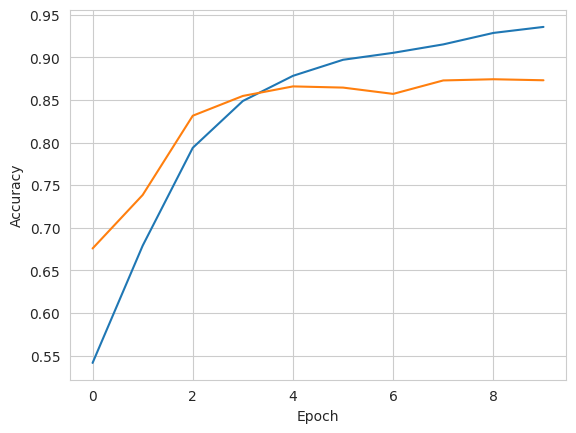

In [14]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

2025-11-10 14:00:46.846255: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

📈 Classification Report:
              precision    recall  f1-score   support

    Negative       0.85      0.87      0.86     12500
    Positive       0.87      0.84      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


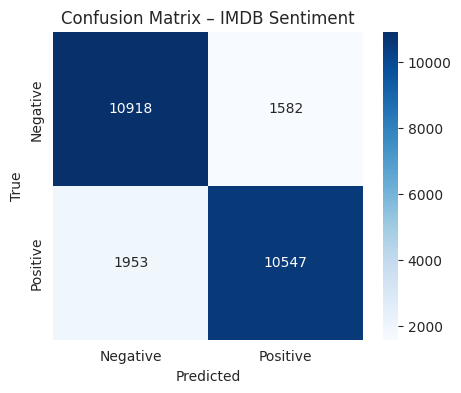

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# --- Evaluate model on test data ---
y_pred_probs = model_tf.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

# --- Classification report ---
print("\n📈 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Negative", "Positive"]))

# --- Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
labels = ["Negative", "Positive"]

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – IMDB Sentiment")
plt.show()


### Pytorch

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert to tensors
device = "cuda" if torch.cuda.is_available() else "cpu"
X_train_t = torch.tensor(X_train, dtype=torch.long)
y_train_t = torch.tensor(y_train, dtype=torch.float32)
X_test_t = torch.tensor(X_test, dtype=torch.long)
y_test_t = torch.tensor(y_test, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train_t, y_train_t), batch_size=512, shuffle=True)

# import torch
# import torch.nn as nn
# import torch.nn.functional as F

class SentimentTransformer(nn.Module):
    def __init__(self, vocab_size, embed_dim=128, num_heads=4, ff_dim=256, num_layers=1, max_len=256):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        self.pos_encoding = self._build_positional_encoding(max_len, embed_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=embed_dim, nhead=num_heads,
                                                   dim_feedforward=ff_dim, batch_first=True)
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(embed_dim, 1)

    def _build_positional_encoding(self, max_len, d_model):
        pos = torch.arange(0, max_len).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        return pe.unsqueeze(0)  # shape (1, max_len, d_model)

    def forward(self, x):
        seq_len = x.size(1)
        x = self.embedding(x) + self.pos_encoding[:, :seq_len, :].to(x.device)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling
        x = torch.sigmoid(self.fc(x))
        return x.squeeze(-1)

model_torch = SentimentTransformer(max_words).to(device)
optimizer = optim.Adam(model_torch.parameters(), lr=1e-3)
criterion = nn.BCELoss()

# --- Training loop ---
for epoch in range(10):
    model_torch.train()
    total_loss = 0
    for xb, yb in train_loader:
        xb, yb = xb.to(device), yb.to(device)
        pred = model_torch(xb).squeeze()
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}: loss={total_loss/len(train_loader):.4f}")


Epoch 1: loss=0.6748
Epoch 2: loss=0.5269
Epoch 3: loss=0.4182
Epoch 4: loss=0.3504
Epoch 5: loss=0.3240
Epoch 6: loss=0.2709
Epoch 7: loss=0.2432
Epoch 8: loss=0.2180
Epoch 9: loss=0.1936
Epoch 10: loss=0.1668


In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

# --- Evaluate on the test set ---
model_torch.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for i in range(0, len(X_test_t), 512):
        xb = X_test_t[i:i+512].to(device)
        preds = model_torch(xb).squeeze().cpu()
        y_pred.extend((preds > 0.5).int().numpy())
        y_true.extend(y_test_t[i:i+512].numpy())

# # --- Classification report ---
# print("\n📈 Classification Report:")
# print(classification_report(y_true, y_pred, target_names=["Negative", "Positive"]))

# # --- Confusion matrix ---
# cm = confusion_matrix(y_true, y_pred)
# labels = ["Negative", "Positive"]

# plt.figure(figsize=(5, 4))
# sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
#             xticklabels=labels, yticklabels=labels)
# plt.xlabel("Predicted")
# plt.ylabel("True")
# plt.title("Confusion Matrix – PyTorch IMDB Sentiment")
plt.show()


              precision    recall  f1-score   support

    negative       0.81      0.86      0.83     12500
    positive       0.85      0.80      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


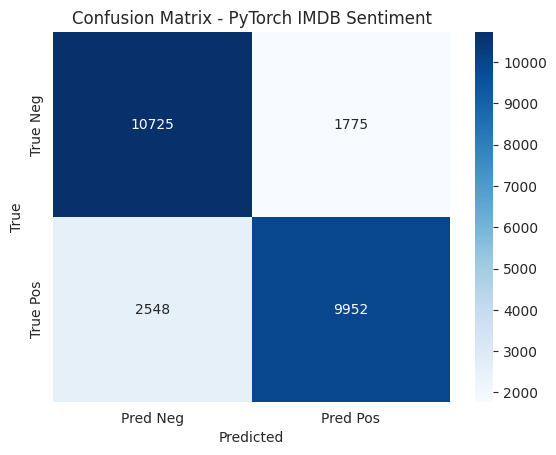

In [18]:
import torch
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_torch.eval()

# --- Create dataset & dataloader ---
test_ds = TensorDataset(X_test_t, y_test_t)
test_loader = DataLoader(test_ds, batch_size=512, shuffle=False)

# --- Evaluation ---
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in test_loader:
        xb, yb = xb.to(device), yb.to(device)
        preds = model_torch(xb).squeeze()
        y_true.extend(yb.cpu().numpy())
        y_pred.extend((preds > 0.5).int().cpu().numpy())

# --- Metrics ---
print(classification_report(y_true, y_pred, target_names=["negative", "positive"]))

# --- Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Pred Neg", "Pred Pos"],
            yticklabels=["True Neg", "True Pos"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - PyTorch IMDB Sentiment")
plt.show()


In [19]:
def run_imdb_transformer(
    max_words=10000,
    max_len=200,
    embed_dim=32,
    num_heads=2,
    ff_dim=64,
    dropout=0.3,
    lr=1e-3,
    epochs=5,
    batch_size=512,
    val_split=0.2,
    plot_training=True,
    plot_cm=True,
):
    import tensorflow as tf
    import tensorflow_datasets as tfds
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras import layers, models, optimizers, callbacks
    from sklearn.metrics import classification_report, confusion_matrix
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

    assert embed_dim % num_heads == 0, "embed_dim must be divisible by num_heads"
    key_dim = embed_dim // num_heads

    # --- Load raw IMDB ---
    ds_train = tfds.load('imdb_reviews', split='train', as_supervised=True)
    ds_test  = tfds.load('imdb_reviews',  split='test',  as_supervised=True)

    train_texts, train_labels = [], []
    for text, label in tfds.as_numpy(ds_train):
        train_texts.append(text.decode("utf-8"))
        train_labels.append(label)

    test_texts, test_labels = [], []
    for text, label in tfds.as_numpy(ds_test):
        test_texts.append(text.decode("utf-8"))
        test_labels.append(label)

    # --- Tokenize + pad ---
    tokenizer = Tokenizer(num_words=max_words, oov_token="<UNK>")
    tokenizer.fit_on_texts(train_texts)

    X_train = tokenizer.texts_to_sequences(train_texts)
    X_test  = tokenizer.texts_to_sequences(test_texts)

    X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
    X_test  = pad_sequences(X_test,  maxlen=max_len, padding='post', truncating='post')

    y_train = np.array(train_labels)
    y_test  = np.array(test_labels)

    # --- Build model (single Transformer block with proper residuals) ---
    inputs = layers.Input(shape=(max_len,), dtype="int32")
    x = layers.Embedding(max_words, embed_dim)(inputs)

    # simple learned positional embedding
    pos = tf.range(start=0, limit=max_len, delta=1)
    pos_emb = layers.Embedding(input_dim=max_len, output_dim=embed_dim)(pos)
    x = x + pos_emb

    attn = layers.MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(x, x)
    x = layers.Add()([x, attn])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    ff = layers.Dense(ff_dim, activation='relu')(x)
    ff = layers.Dropout(dropout)(ff)
    ff = layers.Dense(embed_dim)(ff)        # project back to embed_dim
    x = layers.Add()([x, ff])
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizers.Adam(learning_rate=lr),
                  loss='binary_crossentropy', metrics=['accuracy'])

    # --- Train ---
    es = callbacks.EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
    hist = model.fit(X_train, y_train,
                     epochs=epochs,
                     batch_size=batch_size,
                     validation_split=val_split,
                     callbacks=[es],
                     verbose=0)

    # --- Evaluate ---
    y_pred_probs = model.predict(X_test, verbose=0).ravel()
    y_pred = (y_pred_probs > 0.5).astype("int32")

    report = classification_report(y_test, y_pred, target_names=["Negative", "Positive"], output_dict=False)
    print("\nClassification Report:\n", report)

    cm = confusion_matrix(y_test, y_pred)

    # --- Plots ---
    if plot_training:
        plt.figure()
        plt.plot(hist.history['accuracy'], label='train_acc')
        plt.plot(hist.history['val_accuracy'], label='val_acc')
        plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.tight_layout(); plt.show()

    if plot_cm:
        plt.figure(figsize=(5, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                    xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
        plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix – IMDB Sentiment")
        plt.tight_layout(); plt.show()

    return model, hist, report, cm, tokenizer


In [20]:
# 8 configurations for IMDB Transformer
configs = [
    # Small, fast baselines (short seq, small vocab)
    {"name":"A_small_fast",
     "max_words":10000, "max_len":128,
     "embed_dim":32, "num_heads":2, "ff_dim":64,
     "dropout":0.3, "lr":1e-3, "epochs":4, "batch_size":512},

    {"name":"B_small_heads3",
     "max_words":15000, "max_len":128,
     "embed_dim":48, "num_heads":3, "ff_dim":96,
     "dropout":0.3, "lr":1e-3, "epochs":4, "batch_size":512},

    # Medium sequence depth changes
    {"name":"C_med_longer_seq",
     "max_words":20000, "max_len":200,
     "embed_dim":64, "num_heads":4, "ff_dim":128,
     "dropout":0.3, "lr":7e-4, "epochs":5, "batch_size":512},

    {"name":"D_med_more_ff",
     "max_words":20000, "max_len":200,
     "embed_dim":64, "num_heads":4, "ff_dim":256,
     "dropout":0.3, "lr":7e-4, "epochs":5, "batch_size":512},

    # Larger vocab vs longer seq tradeoff
    {"name":"E_large_vocab",
     "max_words":40000, "max_len":200,
     "embed_dim":64, "num_heads":4, "ff_dim":128,
     "dropout":0.3, "lr":7e-4, "epochs":6, "batch_size":512},

    {"name":"F_long_seq",
     "max_words":20000, "max_len":256,
     "embed_dim":64, "num_heads":4, "ff_dim":192,
     "dropout":0.3, "lr":7e-4, "epochs":6, "batch_size":512},

    # Heavier model
    {"name":"G_heavy",
     "max_words":40000, "max_len":256,
     "embed_dim":96, "num_heads":6, "ff_dim":256,
     "dropout":0.3, "lr":6e-4, "epochs":6, "batch_size":512},

    # Regularization variant
    {"name":"H_dropout_high",
     "max_words":30000, "max_len":192,
     "embed_dim":64, "num_heads":4, "ff_dim":128,
     "dropout":0.5, "lr":1e-3, "epochs":5, "batch_size":512},
]



=== Running configuration: A_small_fast ===


2025-11-10 14:01:12.079582: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-10 14:01:18.257168: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:01:18.257242: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:01:18.257272: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.84      0.78      0.80     12500
    Positive       0.79      0.85      0.82     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.81     25000
weighted avg       0.81      0.81      0.81     25000


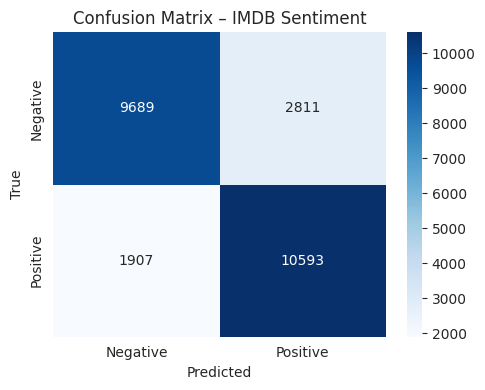


=== Running configuration: B_small_heads3 ===


2025-11-10 14:01:42.883404: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:01:42.883482: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:01:42.883501: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:01:42.883544: I external/l


Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.89      0.83     12500
    Positive       0.87      0.75      0.80     12500

    accuracy                           0.82     25000
   macro avg       0.83      0.82      0.82     25000
weighted avg       0.83      0.82      0.82     25000


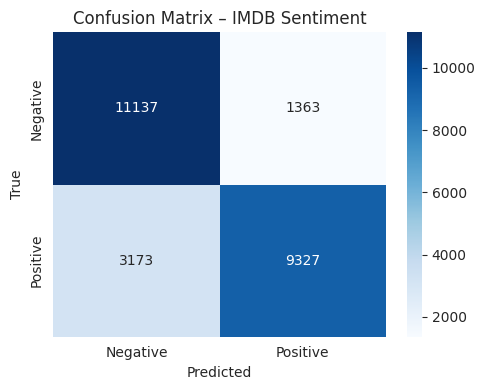


=== Running configuration: C_med_longer_seq ===


2025-11-10 14:02:05.018862: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-10 14:02:11.112998: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_30', 12 bytes spill stores, 12 bytes spill loads

2025-11-10 14:02:11.113664: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_29', 32 bytes spill stores, 32 bytes spill loads

2025-11-10 14:02:11.124750: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_29', 4 bytes spill stores, 4 bytes spill loads

2025-11-10 14:02:11.130329: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are 


Classification Report:
               precision    recall  f1-score   support

    Negative       0.78      0.86      0.82     12500
    Positive       0.84      0.75      0.79     12500

    accuracy                           0.81     25000
   macro avg       0.81      0.81      0.80     25000
weighted avg       0.81      0.81      0.80     25000


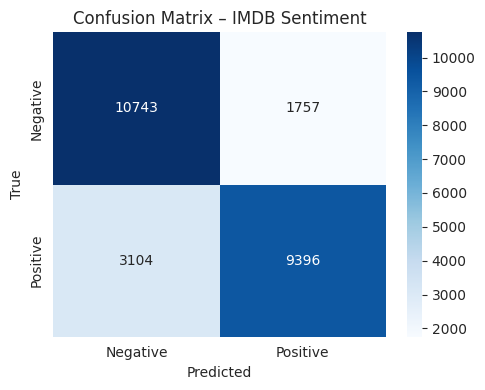


=== Running configuration: D_med_more_ff ===


2025-11-10 14:02:45.652302: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2735', 100 bytes spill stores, 100 bytes spill loads

2025-11-10 14:02:51.197902: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2735', 100 bytes spill stores, 100 bytes spill loads

2025-11-10 14:02:54.707125: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:02:55.909072: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_7', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:03:00.038845: I external/local_x


Classification Report:
               precision    recall  f1-score   support

    Negative       0.81      0.91      0.86     12500
    Positive       0.90      0.79      0.84     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000


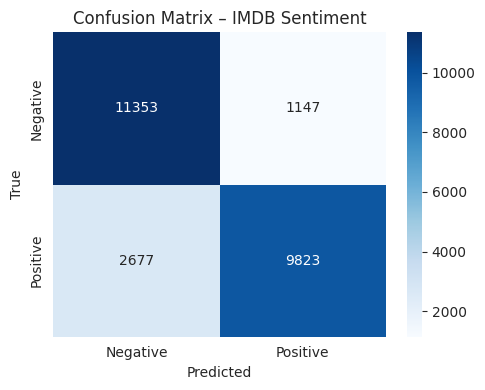


=== Running configuration: E_large_vocab ===

Classification Report:
               precision    recall  f1-score   support

    Negative       0.80      0.86      0.83     12500
    Positive       0.85      0.79      0.82     12500

    accuracy                           0.83     25000
   macro avg       0.83      0.83      0.83     25000
weighted avg       0.83      0.83      0.83     25000


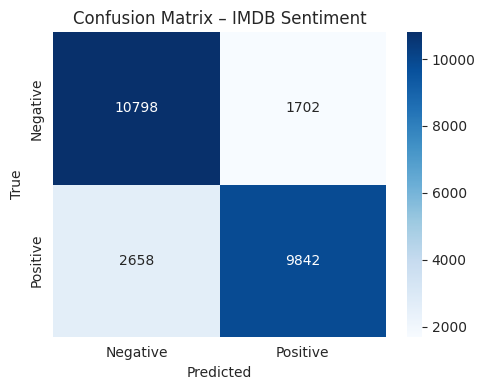


=== Running configuration: F_long_seq ===


2025-11-10 14:03:42.273103: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2460', 4 bytes spill stores, 4 bytes spill loads

2025-11-10 14:03:42.437239: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33', 28 bytes spill stores, 28 bytes spill loads

2025-11-10 14:03:42.923200: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2735', 64 bytes spill stores, 64 bytes spill loads

2025-11-10 14:03:50.837304: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2735', 64 bytes spill stores, 64 bytes spill loads

2025-11-10 14:03:55.050716: I external/local


Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.92      0.87     12500
    Positive       0.91      0.79      0.85     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000


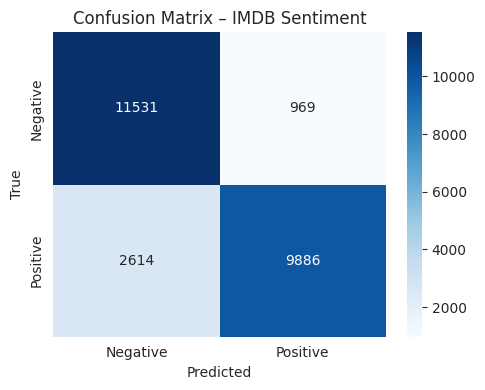


=== Running configuration: G_heavy ===


2025-11-10 14:04:12.475665: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2025-11-10 14:04:19.399404: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2735', 64 bytes spill stores, 64 bytes spill loads

2025-11-10 14:04:19.510619: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2735', 4 bytes spill stores, 4 bytes spill loads

2025-11-10 14:04:19.555721: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2669', 64 bytes spill stores, 64 bytes spill loads

2025-11-10 14:04:19.605567: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Register


Classification Report:
               precision    recall  f1-score   support

    Negative       0.88      0.85      0.87     12500
    Positive       0.86      0.89      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


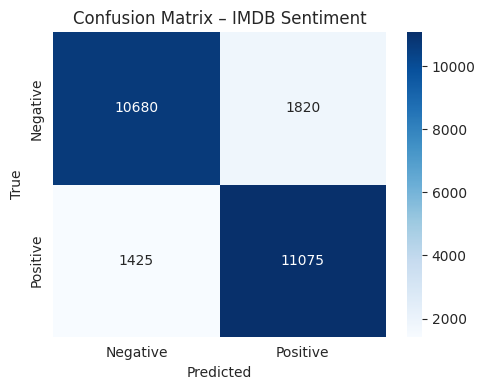


=== Running configuration: H_dropout_high ===


2025-11-10 14:05:01.547924: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_29', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:05:01.980021: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_33', 96 bytes spill stores, 96 bytes spill loads

2025-11-10 14:05:02.043095: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2735', 64 bytes spill stores, 64 bytes spill loads

2025-11-10 14:05:02.063508: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_2460', 4 bytes spill stores, 4 bytes spill loads

2025-11-10 14:05:02.119247: I external/local_xla


Classification Report:
               precision    recall  f1-score   support

    Negative       0.82      0.87      0.84     12500
    Positive       0.86      0.81      0.83     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000


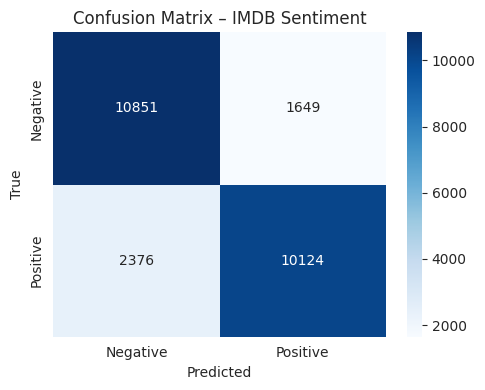


=== Results summary ===
               name  max_words  max_len  embed_dim  num_heads  ff_dim  \
0           G_heavy      40000      256         96          6     256   
1        F_long_seq      20000      256         64          4     192   
2     D_med_more_ff      20000      200         64          4     256   
3    H_dropout_high      30000      192         64          4     128   
4     E_large_vocab      40000      200         64          4     128   
5      A_small_fast      10000      128         32          2      64   
6    B_small_heads3      15000      128         48          3      96   
7  C_med_longer_seq      20000      200         64          4     128   

   dropout      lr  epochs  batch_size  val_accuracy  test_accuracy  \
0      0.3  0.0006       6         512        0.8828         0.8702   
1      0.3  0.0007       6         512        0.8790         0.8567   
2      0.3  0.0007       5         512        0.8770         0.8470   
3      0.5  0.0010       5       

In [21]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from tensorflow.keras.preprocessing.sequence import pad_sequences

rows = []
models = {}
histories = {}

for cfg in configs:
    print(f"\n=== Running configuration: {cfg['name']} ===")
    model, hist, report, cm, tokenizer = run_imdb_transformer(
        max_words=cfg["max_words"],
        max_len=cfg["max_len"],
        embed_dim=cfg["embed_dim"],
        num_heads=cfg["num_heads"],
        ff_dim=cfg["ff_dim"],
        dropout=cfg["dropout"],
        lr=cfg["lr"],
        epochs=cfg["epochs"],
        batch_size=cfg["batch_size"],
        val_split=0.2,
        plot_training=False,
        plot_cm=True,
    )

    # --- Evaluate on test set ---
    X_test_pad = pad_sequences(
        tokenizer.texts_to_sequences(test_texts),
        maxlen=cfg["max_len"], padding="post", truncating="post"
    )
    y_pred_probs = model.predict(X_test_pad, verbose=0).ravel()
    y_pred = (y_pred_probs > 0.5).astype("int32")

    acc = accuracy_score(test_labels, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        test_labels, y_pred, average="binary", zero_division=0
    )

    # --- Collect metrics ---
    final_val_acc = max(hist.history["val_accuracy"])
    rows.append({
        "name": cfg["name"],
        "max_words": cfg["max_words"],
        "max_len": cfg["max_len"],
        "embed_dim": cfg["embed_dim"],
        "num_heads": cfg["num_heads"],
        "ff_dim": cfg["ff_dim"],
        "dropout": cfg["dropout"],
        "lr": cfg["lr"],
        "epochs": cfg["epochs"],
        "batch_size": cfg["batch_size"],
        "val_accuracy": round(float(final_val_acc), 4),
        "test_accuracy": round(float(acc), 4),
        "precision": round(float(prec), 4),
        "recall": round(float(rec), 4),
        "f1": round(float(f1), 4),
    })

    models[cfg["name"]] = model
    histories[cfg["name"]] = hist

df = pd.DataFrame(rows).sort_values("f1", ascending=False).reset_index(drop=True)
print("\n=== Results summary ===")
print(df)

print("\n=== LaTeX Table ===")
print(df.to_latex(
    index=False,
    float_format="%.4f",
    caption="Transformer configurations and performance on IMDB sentiment classification",
    label="tab:transformer_results",
    escape=False
))


In [22]:
def show_sample_predictions(model, tokenizer, texts, labels, max_len=200, n=5):
    """
    Display a few reviews with predicted and true sentiment.
    """
    indices = np.random.choice(len(texts), n, replace=False)
    for i, idx in enumerate(indices, 1):
        review = texts[idx]
        true_label = int(labels[idx])

        seq = tokenizer.texts_to_sequences([review])
        seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')
        prob = model.predict(seq, verbose=0)[0][0]
        pred_label = int(prob > 0.5)

        print(f"\n--- Review {i} ---")
        print(f"Predicted: {'Positive' if pred_label == 1 else 'Negative'} "
              f"(p={prob:.3f}) | True: {'Positive' if true_label == 1 else 'Negative'}")
        print(f"Text: {review[:500]}{'...' if len(review) > 500 else ''}")

show_sample_predictions(models["G_heavy"], tokenizer, test_texts, test_labels, max_len=256, n=5)

2025-11-10 14:05:22.772505: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:05:22.772572: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:05:22.772591: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.



--- Review 1 ---
Predicted: Positive (p=0.930) | True: Positive
Text: I saw this movie on the lowlands festival (23, 24, 25th of august) after a friend of mine said this is a very cool movie about the history of skating. I didn't now what to expect from this movie. Was it recorded by a couple of skaters who thought they could do a couple of cool tricks, or was it a documentary about skating.<br /><br />So i went in, after waiting for about an hour, whit out any expectations.<br /><br />This movie is really a nice piece of work about the beginning of skateboarding....

--- Review 2 ---
Predicted: Positive (p=0.970) | True: Positive
Text: Don't be fooled: this isn't yet another tired example of the Girls From Outer Space Pretending To Be The French Ski Team Come To Earth To Collect As Much Sperm As Possible genre, though the synopsis may suggest otherwise. This movie is a gem, an absolute jewel that has enriched my life from the moment I laid eyes upon it. Hilarious, exhilarating, actio

In [23]:
show_sample_predictions(models["E_large_vocab"], tokenizer, test_texts, test_labels, max_len=200, n=5)

2025-11-10 14:05:24.022890: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:05:24.022959: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:05:24.022969: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:05:24.022977: I external/l


--- Review 1 ---
Predicted: Positive (p=0.750) | True: Positive
Text: When I saw this on TV I was nervous...whats if they messed it up? Millions of families like mine that live with a brain damaged man, in my case my Dad, would be let down. I watched it with my Mum and we both ended up crying, it was so accurate and captured how the family feels as well as the person having suffered the brain injury. The actors were all wonderful and I had no complaints, my Mums told me she hasn't been able to stop thinking about it. I hope this program made many people aware of w...

--- Review 2 ---
Predicted: Negative (p=0.037) | True: Negative
Text: This is by far the worst thing I have ever seen on film. My uncle's home movies have more talent in them then this piece of crap.<br /><br />The plot summary is basically that these twin kick boxers are playing some sick survival game with a man and his private army on some island. The man has a very cheap paper maché looking hand.<br /><br />The actin

### TODO

Efficiency of determined classifier depend on several parameters, related to:
* Preprocessing: sequence length and vocabulary size
* Architecture: embedding dimension, number of heads, size of the hidden layer (feed forward dimensionon)
* Training process: number of epochs and learning rate

Prepare 8 configurations (including various preprocessing parameters). Report results in the table summarizing parameter values and classification results (report accuracy, precision, recall, F1).

Display a few reviews from the dataset and print classification result


# 3.2 Visual transformer (ViT)

Vision Transformers (ViTs) are models that apply the Transformer architecture directly to images by representing them as sequences of patch embeddings, allowing self-attention to capture relationships across the entire image without relying on convolutional operations.

**Patches**

Instead of tokens from text, ViT creates “visual tokens.”
An input image of shape $H\times W \times C$ is split into fixed size non-overlapping patches of size $P \times P \times C$. Hence, an image is represented by a sequence of visual tokens of length $N$, where $N = \frac{H \times W}{P^2}$.

Next, each patch $\mathbf{x}_i \in \mathbb{R}^{P \times P \times C}$  is flattened into a vector:

$$
\mathbf{x}_i \rightarrow \mathrm{vec}(\mathbf{x}_i) \in \mathbb{R}^{P^2 C}
$$

---
**Linear patch embedding**

Each flattened patch is linearly projected to a fixed-dimensional embedding space of dimension $D$:

$$
\mathbf{z}_i = \mathbf{W}_E \, \mathbf{x}_i + \mathbf{b}_E,
\quad \mathbf{W}_E \in \mathbb{R}^{D \times (P^2 C)}
$$

This produces a sequence of embedded tokens:

$$
\mathbf{Z} = [\mathbf{z}_1, \mathbf{z}_2, \ldots, \mathbf{z}_N]
$$

The matrix $\mathbf{W}_E$ is learnable.

---
**Class Token**

A learnable *classification token* $\mathbf{z}_\text{CLS} \in \mathbb{R}^{D} $ **can be** inserted at the beginning of the sequence:

$$
\mathbf{Z}' = [\mathbf{z}_\text{CLS}, \mathbf{z}_1, \ldots, \mathbf{z}_N]
$$

---
**Positional Embedding**

Transformer has no inherent notion of spatial order. Information on positions of patches in the image is encoded as embedding vectors.

Patch positions are indexed in images along rows or columns, and form a sequences of size $N$, e.g:

(0,0), (0,1), (0,2), ..., (1,0), (1,1), ...

Typically, learnable embeddings $ \mathbf{PE} \in \mathbb{R}^{(N+1) \times D} $ are used.


$$
\mathbf{Z}'' = \mathbf{Z}' + \mathbf{PE}
$$

---
**Transformer Encoder Block**

* Transformer Encoder Block
  * Self-Attention Block
  * MLP (Multilayer Perceptron

Transformerr Encoder Blocks can be repeated several times. It is believed that subsequent blocks catch higher level features.

The output is a sequence of hidden states $H_{\text{enc}} = [\mathbf{h}_{\text{CLS}}, \mathbf{h}_1, \ldots, \mathbf{h}_n, \mathbf{h}_{\text{SEP}}]$

---
**Dense and output layers**

If class token is used, its value $\mathbf{h}_{\text{CLS}}$ is extracted. In the opposite case mean value (sometimes all values) of $\mathbf{h}_1, \ldots, \mathbf{h}_n$ is used in the final block making classification.

## 3.2.1 Example of patches (CIFAR 10)

In [24]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print(f"Train: {x_train.shape}, Test: {x_test.shape}")
# (50000, 32, 32, 3) and (10000, 32, 32, 3)


Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)


In [25]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


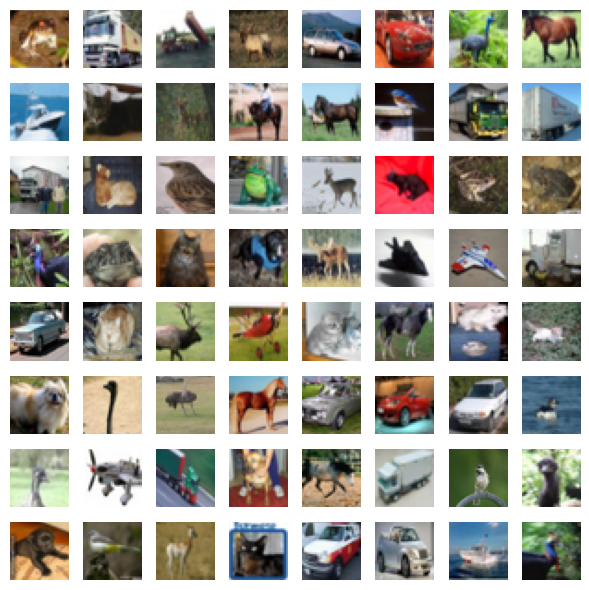

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(8, 8, figsize=(6, 6))
for i, ax in enumerate(axes.flat):
    patch = x_train[i]
    ax.imshow(patch)
    ax.axis("off")

plt.tight_layout()
plt.show()


In [27]:

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = tf.shape(patches)[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches
patch_size = 4
xp = Patches(patch_size=patch_size)(x_train[19].reshape(1, 32, 32, 3))

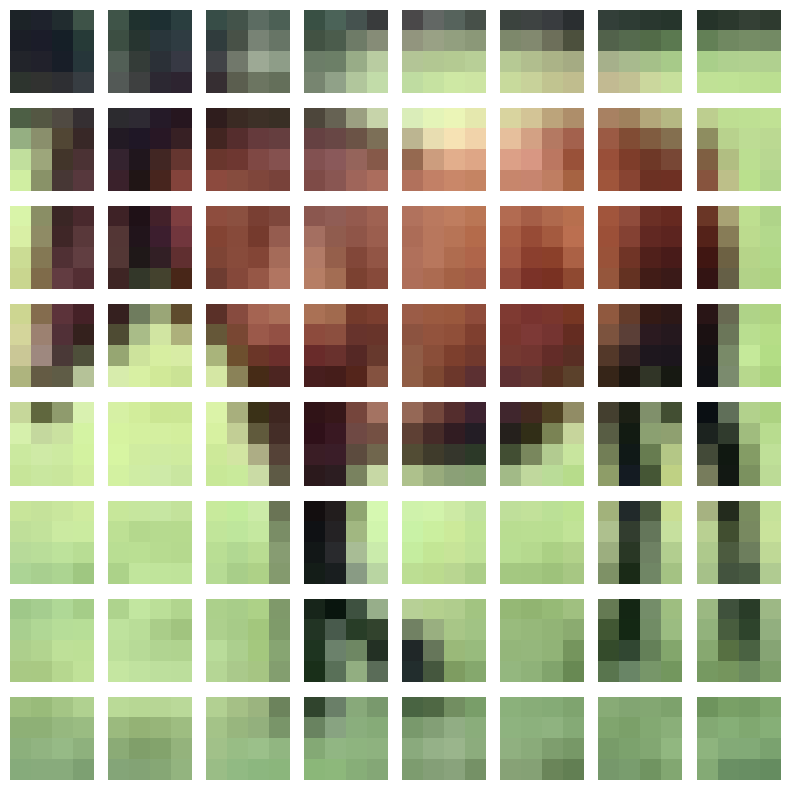

In [28]:
import matplotlib.pyplot as plt
import tensorflow as tf

patch_size = 4

xp = Patches(patch_size=patch_size)(x_train[7].reshape(1, 32, 32, 3))

patches = xp[0].numpy().reshape(-1, patch_size, patch_size, 3)

fig, axes = plt.subplots(x_train.shape[1]//patch_size, x_train.shape[1]//patch_size, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    patch = patches[i]
    ax.imshow(patch)
    ax.axis("off")

plt.tight_layout()
plt.show()


## 3.2.1 Fashion MNIST example (Tensorflow)

In this example class token is not used. Instead, all values of hidden states are used for final classification.

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- 1. Load Fashion-MNIST ---
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0

# --- 2. Define patch extraction and encoder layers ---
patch_size = 4
num_patches = (x_train.shape[1] // patch_size) ** 2
projection_dim = 64

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = tf.shape(patches)[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(input_dim=num_patches, output_dim=projection_dim)

    def call(self, patches):
        x = self.projection(patches)
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        pos_emb = self.position_embedding(positions)
        pos_emb = tf.expand_dims(pos_emb, axis=0)
        return x + pos_emb

# --- 3. Build ViT model ---
def create_vit_classifier():
    inputs = layers.Input(shape=(28,28,1))
    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Transformer blocks
    for _ in range(4):
        # LayerNorm + Multi-Head Self Attention
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=4, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])

        # MLP block
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(projection_dim * 2, activation=tf.nn.gelu)(x3)
        x3 = layers.Dense(projection_dim)(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Classification head
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    logits = layers.Dense(10)(representation)

    return keras.Model(inputs=inputs, outputs=logits)

model = create_vit_classifier()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

# --- 4. Train ---
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

# --- 5. Evaluate ---
model.evaluate(x_test, y_test)


2025-11-10 14:05:34.219302: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9351', 92 bytes spill stores, 92 bytes spill loads

2025-11-10 14:05:45.511226: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_4', 12 bytes spill stores, 12 bytes spill loads

2025-11-10 14:05:45.662031: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9351', 92 bytes spill stores, 92 bytes spill loads

2025-11-10 14:06:36.502783: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this 

305/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9100 - loss: 0.2604

2025-11-10 14:06:38.882101: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:06:38.882150: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:06:39.185631: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_5', 4 bytes spill stores, 4 bytes spill loads

2025-11-10 14:06:39.196800: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Regi

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9072 - loss: 0.2612


[0.2612467110157013, 0.9071999788284302]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.85      0.88      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.90      0.82      0.86      1000
       Dress       0.90      0.91      0.90      1000
        Coat       0.79      0.91      0.85      1000
      Sandal       0.99      0.97      0.98      1000
       Shirt       0.77      0.69      0.73      1000
     Sneaker       0.94      0.97      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000


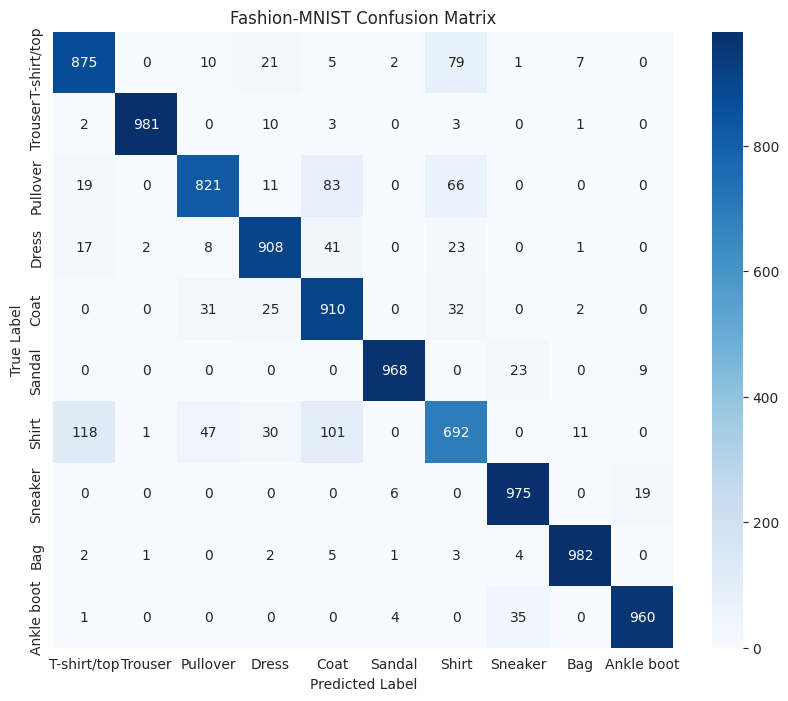

In [30]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Class names for Fashion-MNIST ---
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


# --- 2. Predict on test set ---
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# --- 3. Classification report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# --- 4. Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Fashion-MNIST Confusion Matrix")
plt.show()


**GELU** is a smooth function similart to ReLU commonly used in Transformer models

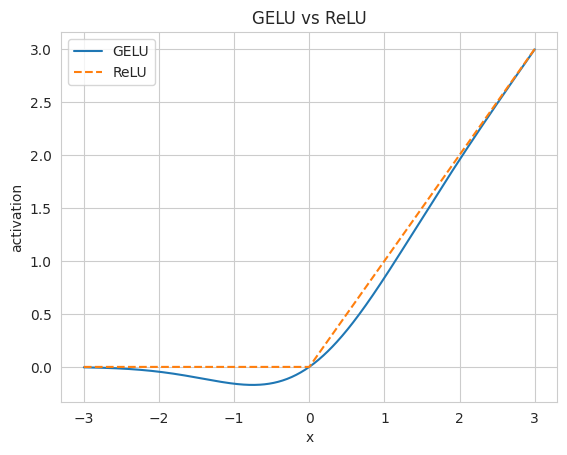

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Exact GELU
def gelu(x):
    return 0.5 * x * (1 + erf(x / np.sqrt(2)))

x = np.linspace(-3, 3, 500)
y = gelu(x)

plt.plot(x, y, label="GELU")
plt.plot(x, np.maximum(0, x), '--', label="ReLU")
plt.title("GELU vs ReLU")
plt.xlabel("x")
plt.ylabel("activation")
plt.grid(True)
plt.legend()
plt.show()


## 3.2.2 Fashion MNIST with class token (TF)

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# --- 1. Load Fashion-MNIST ---
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train[..., None] / 255.0
x_test = x_test[..., None] / 255.0


# --- 2. Define patch extraction and encoder layers ---
patch_size = 4
num_patches = (x_train.shape[1] // patch_size) ** 2
projection_dim = 64

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super().__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding='VALID'
        )
        patch_dims = tf.shape(patches)[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super().__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches + 1,  # +1 na class token
            output_dim=projection_dim
        )
        # Inicjalizujemy class token jako trenowalny wektor
        self.class_token = self.add_weight(
            name="class_token",
            shape=(1, 1, projection_dim),
            initializer="random_normal",
            trainable=True,
        )

    def call(self, patches):
        batch_size = tf.shape(patches)[0]
        x = self.projection(patches)

        # Broadcast class token for each batch element
        class_token = tf.broadcast_to(self.class_token, [batch_size, 1, projection_dim])

        # Class token is inserted at the beginning
        x = tf.concat([class_token, x], axis=1)

        # Token positions (add 1 because of the class token )
        positions = tf.range(start=0, limit=self.num_patches + 1, delta=1)
        pos_emb = self.position_embedding(positions)
        pos_emb = tf.expand_dims(pos_emb, axis=0)
        return x + pos_emb


# --- 3. Build ViT model ---
def create_vit_classifier():
    inputs = layers.Input(shape=(28, 28, 1))
    patches = Patches(patch_size)(inputs)
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Transformer blocks
    for _ in range(4):
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=4, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        x2 = layers.Add()([attention_output, encoded_patches])

        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = layers.Dense(projection_dim * 2, activation=tf.nn.gelu)(x3)
        x3 = layers.Dense(projection_dim)(x3)
        encoded_patches = layers.Add()([x3, x2])

    # Classification head (tylko class token)
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    # extract the first token = class token
    class_token_output = representation[:, 0, :]
    representation = layers.Dropout(0.5)(class_token_output)
    logits = layers.Dense(10)(representation)

    return keras.Model(inputs=inputs, outputs=logits)


# --- 4. Compile & train ---
model = create_vit_classifier()
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"],
)

model.summary()

# --- 5. Train ---
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1, verbose=0)

# --- 6. Evaluate ---
model.evaluate(x_test, y_test)


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patches_3 (Patches) │ (None, None, 16)  │          0 │ input_layer_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ patch_encoder_1     │ (None, 50, 64)    │      4,352 │ patches_3[0][0]   │
│ (PatchEncoder)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ patch_encoder_1[… │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_33 (Add)        │ (None, 50, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ patch_encoder_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_33[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 50, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 50, 64)    │      8,256 │ dense_41[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_34 (Add)        │ (None, 50, 64)    │          0 │ dense_42[0][0],   │
│                     │                   │            │ add_33[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_34[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 50, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_35 (Add)        │ (None, 50, 64)    │          0 │ multi_head_atten… │
│                     │                   │            │ add_34[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_35[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 50, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 50, 64)    │      8,256 │ dense_43[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_36 (Add)        │ (None, 50, 64)    │          0 │ dense_44[0][0],   │
│                     │                   │            │ add_35[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 50, 64)    │        128 │ add_36[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 337,930 (1.29 MB)

 Trainable params: 337,930 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

2025-11-10 14:06:50.845250: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_101', 4 bytes spill stores, 4 bytes spill loads

2025-11-10 14:06:50.849056: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 12 bytes spill stores, 12 bytes spill loads

2025-11-10 14:06:51.020105: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_112', 8 bytes spill stores, 8 bytes spill loads

2025-11-10 14:06:51.081797: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_9439', 96 bytes spill stores, 96 bytes spill loads

2025-11-10 14:07:00.642575: I external/local_xl

298/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.3255

2025-11-10 14:07:53.092091: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:07:53.092147: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-10 14:07:53.255247: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 4 bytes spill stores, 4 bytes spill loads

2025-11-10 14:07:53.359467: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Regi

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8803 - loss: 0.3281


[0.3280884623527527, 0.880299985408783]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.82      0.82      0.82      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.82      0.79      0.80      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.79      0.79      0.79      1000
      Sandal       0.96      0.98      0.97      1000
       Shirt       0.68      0.69      0.69      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


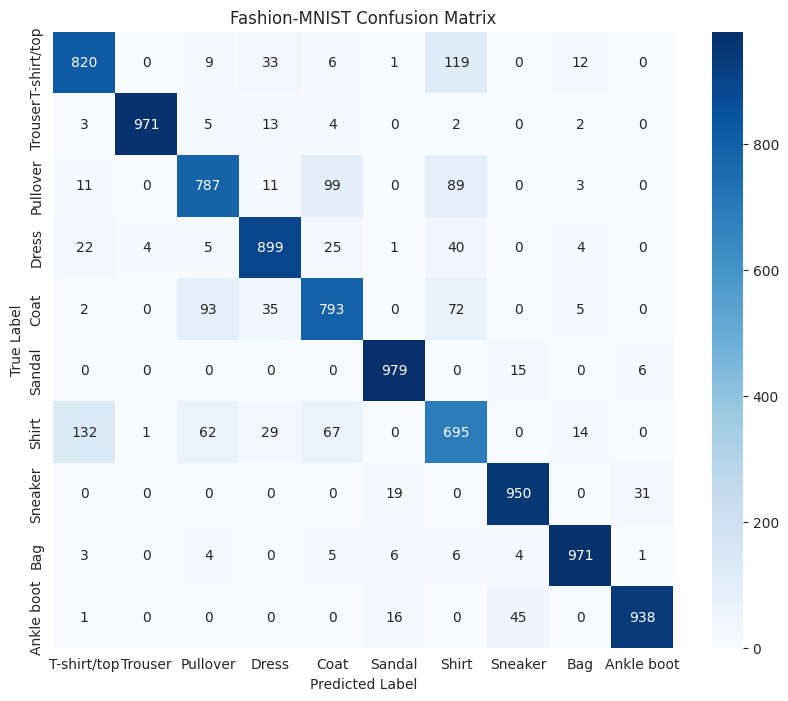

In [33]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Class names for Fashion-MNIST ---
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


# --- 2. Predict on test set ---
y_pred_logits = model.predict(x_test)
y_pred = np.argmax(y_pred_logits, axis=1)

# --- 3. Classification report ---
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

# --- 4. Confusion matrix ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Fashion-MNIST Confusion Matrix")
plt.show()


## 3.2.3 Fashion MNIST Pytorch (with class token)

In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# --- Data ---
transform = transforms.Compose([
    # transforms.Resize(32),
    transforms.ToTensor()
])
train_data = datasets.FashionMNIST(root='.', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='.', train=False, transform=transform)
train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128)

# --- Model ---
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=1, patch_size=4, emb_size=128, img_size=28):
        super().__init__()
        self.proj = nn.Conv2d(in_channels, emb_size, kernel_size=patch_size, stride=patch_size)
        self.cls_token = nn.Parameter(torch.randn(1, 1, emb_size))
        num_patches = (img_size // patch_size) ** 2
        self.pos_embed = nn.Parameter(torch.randn(1, num_patches + 1, emb_size))

    def forward(self, x):
        B = x.shape[0]
        x = self.proj(x).flatten(2).transpose(1, 2)  # (B, num_patches, emb_size)
        cls_tokens = self.cls_token.expand(B, -1, -1)
        x = torch.cat((cls_tokens, x), dim=1)
        x = x + self.pos_embed
        return x

class ViT(nn.Module):
    def __init__(self, num_classes=10, emb_size=128, depth=4, n_heads=8, patch_size=4, img_size=28):
        super().__init__()
        self.patch_embed = PatchEmbedding(1, patch_size, emb_size, img_size)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=emb_size, nhead=n_heads, dim_feedforward=emb_size*2, dropout=0.1, activation='gelu', batch_first=True
        )
        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=depth)
        self.head = nn.Linear(emb_size, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.encoder(x)
        cls_output = x[:, 0]
        return self.head(cls_output)

# --- Training ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ViT().to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

for epoch in range(20):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        loss = criterion(model(images), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader):.4f}")

# --- Evaluation ---
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        preds = model(images).argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(f"Test Accuracy: {correct/total:.4f}")


100%|██████████| 26.4M/26.4M [00:03<00:00, 8.31MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 642kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 4.32MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.45MB/s]


Epoch 1, Loss: 0.7938
Epoch 2, Loss: 0.4960
Epoch 3, Loss: 0.4299
Epoch 4, Loss: 0.3937
Epoch 5, Loss: 0.3711
Epoch 6, Loss: 0.3519
Epoch 7, Loss: 0.3369
Epoch 8, Loss: 0.3235
Epoch 9, Loss: 0.3111
Epoch 10, Loss: 0.3000
Epoch 11, Loss: 0.2907
Epoch 12, Loss: 0.2830
Epoch 13, Loss: 0.2733
Epoch 14, Loss: 0.2652
Epoch 15, Loss: 0.2583
Epoch 16, Loss: 0.2522
Epoch 17, Loss: 0.2453
Epoch 18, Loss: 0.2388
Epoch 19, Loss: 0.2329
Epoch 20, Loss: 0.2277
Test Accuracy: 0.8944


In [35]:
import torch, torchvision, platform
print("torch:", torch.__version__)
print("torchvision:", torchvision.__version__)
print(platform.platform())

torch: 2.8.0+cu128
torchvision: 0.23.0+cu128
Linux-6.6.87.2-microsoft-standard-WSL2-x86_64-with-glibc2.39


Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.87      0.83      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.78      0.88      0.83      1000
       Dress       0.89      0.91      0.90      1000
        Coat       0.85      0.80      0.82      1000
      Sandal       0.97      0.96      0.97      1000
       Shirt       0.74      0.71      0.72      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.97      0.98      0.97      1000
  Ankle boot       0.95      0.97      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


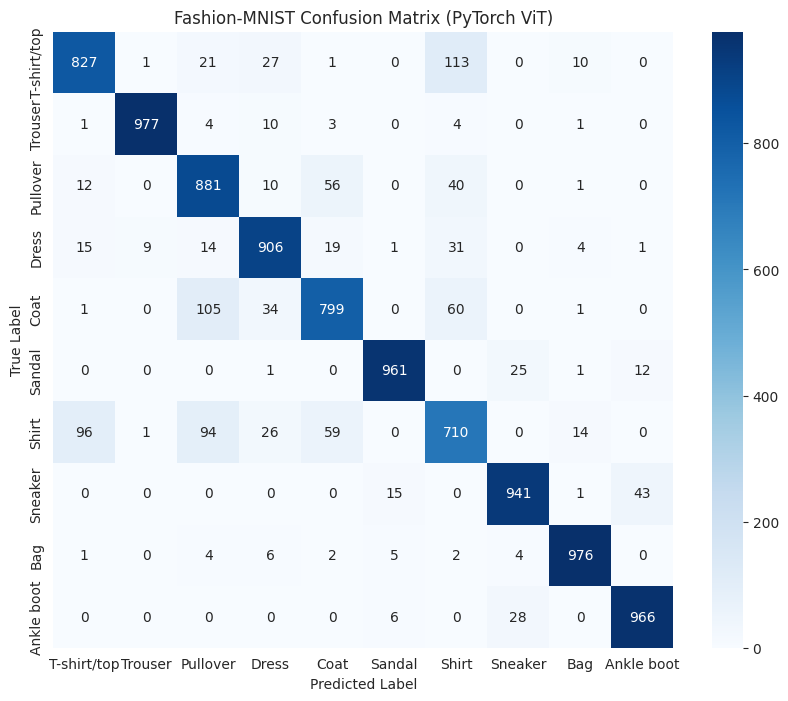

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import torch

# --- 1. Define class names ---
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# --- 2. Get predictions on test set ---
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = torch.argmax(outputs, dim=1)
        all_preds.append(preds.cpu())
        all_labels.append(labels.cpu())

y_pred = torch.cat(all_preds).numpy()
y_true = torch.cat(all_labels).numpy()

# --- 3. Classification report ---
print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

# --- 4. Confusion matrix ---
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.title("Fashion-MNIST Confusion Matrix (PyTorch ViT)")
plt.show()


In [57]:
import time
train_tf = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914,0.4822,0.4465), std=(0.2023,0.1994,0.2010)),
])
test_tf = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.4914,0.4822,0.4465), std=(0.2023,0.1994,0.2010)),
])

train_set = datasets.CIFAR10(root='.', train=True, download=True, transform=train_tf)
test_set  = datasets.CIFAR10(root='.', train=False, download=True, transform=test_tf)

train_loader = DataLoader(train_set, batch_size=256, shuffle=True, num_workers=0, pin_memory=True)
test_loader  = DataLoader(test_set,  batch_size=512, shuffle=False, num_workers=0, pin_memory=True)

CIFAR10_CLASSES = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class PatchEmbedding(nn.Module):
    def __init__(self, in_ch=3, patch=4, emb=128, img=32, use_cls=True):
        super().__init__()
        self.use_cls = use_cls
        self.proj = nn.Conv2d(in_ch, emb, kernel_size=patch, stride=patch)
        n_patches = (img // patch) ** 2
        self.pos_embed = nn.Parameter(torch.randn(1, n_patches + (1 if use_cls else 0), emb))
        if use_cls:
            self.cls_token = nn.Parameter(torch.randn(1, 1, emb))
        else:
            self.register_parameter('cls_token', None)

    def forward(self, x):
        B = x.size(0)
        x = self.proj(x).flatten(2).transpose(1, 2)
        if self.use_cls:
            cls = self.cls_token.expand(B, -1, -1)
            x = torch.cat([cls, x], dim=1)
        return x + self.pos_embed

class ViT(nn.Module):
    def __init__(self, img=32, patch=4, emb=128, depth=4, heads=4, mlp_mul=2,
                 num_classes=10, use_cls=True, dropout=0.1):
        super().__init__()
        self.patch_embed = PatchEmbedding(3, patch, emb, img, use_cls)
        layer = nn.TransformerEncoderLayer(
            d_model=emb, nhead=heads, dim_feedforward=emb*mlp_mul,
            dropout=dropout, activation='gelu', batch_first=True
        )
        self.encoder = nn.TransformerEncoder(layer, num_layers=depth)
        self.norm = nn.LayerNorm(emb)
        self.head = nn.Linear(emb, num_classes)
        self.use_cls = use_cls

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.encoder(x)
        x = self.norm(x)
        if self.use_cls:
            x = x[:, 0]
        else:
            x = x.mean(dim=1)
        return self.head(x)

# --- Training / evaluation functions ---
def train_one_epoch(model, loader, opt, loss_fn, device, max_batches=None):
    model.train()
    t0 = time.time()
    total_loss, correct, total = 0.0, 0, 0
    for bi, (imgs, labels) in enumerate(loader, 1):
        if max_batches and bi > max_batches: break
        imgs, labels = imgs.to(device), labels.to(device)
        opt.zero_grad()
        out = model(imgs)
        loss = loss_fn(out, labels)
        loss.backward()
        opt.step()
        total_loss += loss.item()
        correct += (out.argmax(1) == labels).sum().item()
        total += labels.size(0)
        if bi % 50 == 0:
            print(f"  batch {bi} | loss {total_loss/bi:.4f} | acc {correct/max(1,total):.4f} | {time.time()-t0:.1f}s")
    return total_loss/max(1, bi), correct/max(1, total)

@torch.no_grad()
def evaluate(model, loader, device):
    model.eval()
    preds, labels_all = [], []
    for imgs, labels in loader:
        imgs, labels = imgs.to(device), labels.to(device)
        out = model(imgs)
        preds.append(out.argmax(1).cpu())
        labels_all.append(labels.cpu())
    y_pred = torch.cat(preds).numpy()
    y_true = torch.cat(labels_all).numpy()
    acc = (y_pred == y_true).mean()
    return acc, y_true, y_pred

def run_config(cfg):
    model = ViT(
        img=32, patch=cfg["patch"], emb=cfg["emb"], depth=cfg["depth"],
        heads=cfg["heads"], mlp_mul=cfg["mlp_mul"], use_cls=cfg["use_cls"],
        dropout=cfg["dropout"]
    ).to(device)
    opt = torch.optim.AdamW(model.parameters(), lr=cfg["lr"], weight_decay=cfg["wd"])
    loss_fn = nn.CrossEntropyLoss()

    for ep in range(cfg["epochs"]):
        loss, acc = train_one_epoch(model, train_loader, opt, loss_fn, device)
        if ep == cfg["epochs"]-1:
            print(f"{cfg['name']} Epoch {ep+1}/{cfg['epochs']} Loss={loss:.4f} Acc={acc:.4f}")
    acc_test, y_true, y_pred = evaluate(model, test_loader, device)
    return model, acc_test, y_true, y_pred

In [51]:
configs = [
    {"name": "A_cls_p4_e192_d6", "patch": 4, "emb": 192, "depth": 6, "heads": 6,
     "mlp_mul": 4, "use_cls": True, "dropout": 0.1, "lr": 3e-4, "wd": 1e-4, "epochs": 10},
    {"name": "B_nocls_p4_e192_d6", "patch": 4, "emb": 192, "depth": 6, "heads": 6,
     "mlp_mul": 4, "use_cls": False, "dropout": 0.1, "lr": 3e-4, "wd": 1e-4, "epochs": 10},
    {"name": "C_cls_p8_e256_d8", "patch": 8, "emb": 256, "depth": 8, "heads": 8,
     "mlp_mul": 4, "use_cls": True, "dropout": 0.1, "lr": 3e-4, "wd": 1e-4, "epochs": 10},
    {"name": "D_cls_p2_e128_d4", "patch": 2, "emb": 128, "depth": 4, "heads": 8,
     "mlp_mul": 4, "use_cls": True, "dropout": 0.1, "lr": 3e-4, "wd": 1e-4, "epochs": 10},
]

In [52]:
print(device)
x, y = next(iter(train_loader))
x = x.to(device)
%timeit model(x)

cuda
55 ms ± 661 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [58]:
results = []
outputs = {}
for cfg in configs:
    model, test_acc, y_true, y_pred = run_config(cfg)
    results.append({**cfg, "test_acc": float(test_acc)})
    outputs[cfg["name"]] = {"model": model, "y_true": y_true, "y_pred": y_pred}

  batch 50 | loss 2.1041 | acc 0.2148 | 9.2s
  batch 100 | loss 2.0369 | acc 0.2400 | 18.0s
  batch 150 | loss 1.9800 | acc 0.2641 | 26.8s
  batch 200 | loss 1.9263 | acc 0.2832 | 34.5s
  batch 250 | loss 1.8842 | acc 0.3002 | 43.3s
  batch 300 | loss 1.8456 | acc 0.3160 | 52.3s
  batch 350 | loss 1.8109 | acc 0.3301 | 60.1s
  batch 50 | loss 1.5300 | acc 0.4391 | 8.8s
  batch 100 | loss 1.5112 | acc 0.4465 | 17.8s
  batch 150 | loss 1.4991 | acc 0.4502 | 25.6s
  batch 200 | loss 1.4941 | acc 0.4509 | 34.4s
  batch 250 | loss 1.4832 | acc 0.4558 | 43.3s
  batch 300 | loss 1.4733 | acc 0.4603 | 52.2s
  batch 350 | loss 1.4640 | acc 0.4647 | 60.0s
  batch 50 | loss 1.3635 | acc 0.5064 | 9.0s
  batch 100 | loss 1.3659 | acc 0.5044 | 16.9s
  batch 150 | loss 1.3627 | acc 0.5056 | 25.5s
  batch 200 | loss 1.3578 | acc 0.5068 | 34.3s
  batch 250 | loss 1.3494 | acc 0.5101 | 43.2s
  batch 300 | loss 1.3466 | acc 0.5120 | 56.0s
  batch 350 | loss 1.3398 | acc 0.5142 | 68.7s
  batch 50 | loss 1

KeyboardInterrupt: 

interrupted because the fourth model was taking too long to train

In [63]:
new_config = {"name": "D_fast_p8_e96_d2",
 "patch": 8,
 "emb": 96,
 "depth": 2,
 "heads": 4,
 "mlp_mul": 3,
 "use_cls": False,
 "dropout": 0.1,
 "lr": 6e-4,
 "wd": 1e-4,
 "epochs": 10}

In [64]:
model, test_acc, y_true, y_pred = run_config(new_config)
results.append({**new_config, "test_acc": float(test_acc)})
outputs[new_config["name"]] = {"model": model, "y_true": y_true, "y_pred": y_pred}

  batch 50 | loss 2.0862 | acc 0.2158 | 2.2s
  batch 100 | loss 2.0338 | acc 0.2370 | 3.6s
  batch 150 | loss 1.9920 | acc 0.2527 | 5.0s
  batch 200 | loss 1.9529 | acc 0.2689 | 6.4s
  batch 250 | loss 1.9196 | acc 0.2835 | 7.7s
  batch 300 | loss 1.8897 | acc 0.2949 | 9.0s
  batch 350 | loss 1.8625 | acc 0.3061 | 10.3s
  batch 50 | loss 1.6582 | acc 0.3886 | 0.3s
  batch 100 | loss 1.6445 | acc 0.3961 | 1.6s
  batch 150 | loss 1.6297 | acc 0.4038 | 3.0s
  batch 200 | loss 1.6240 | acc 0.4073 | 4.3s
  batch 250 | loss 1.6150 | acc 0.4094 | 5.6s
  batch 300 | loss 1.6147 | acc 0.4101 | 6.9s
  batch 350 | loss 1.6104 | acc 0.4114 | 8.2s
  batch 50 | loss 1.5244 | acc 0.4406 | 1.3s
  batch 100 | loss 1.5256 | acc 0.4441 | 2.6s
  batch 150 | loss 1.5209 | acc 0.4472 | 4.0s
  batch 200 | loss 1.5180 | acc 0.4452 | 5.9s
  batch 250 | loss 1.5120 | acc 0.4477 | 7.4s
  batch 300 | loss 1.5061 | acc 0.4495 | 9.0s
  batch 350 | loss 1.5017 | acc 0.4521 | 10.6s
  batch 50 | loss 1.4497 | acc 0.47

In [65]:
print(results)

[{'name': 'A_cls_p4_e192_d6', 'patch': 4, 'emb': 192, 'depth': 6, 'heads': 6, 'mlp_mul': 4, 'use_cls': True, 'dropout': 0.1, 'lr': 0.0003, 'wd': 0.0001, 'epochs': 10, 'test_acc': 0.6813}, {'name': 'B_nocls_p4_e192_d6', 'patch': 4, 'emb': 192, 'depth': 6, 'heads': 6, 'mlp_mul': 4, 'use_cls': False, 'dropout': 0.1, 'lr': 0.0003, 'wd': 0.0001, 'epochs': 10, 'test_acc': 0.6885}, {'name': 'C_cls_p8_e256_d8', 'patch': 8, 'emb': 256, 'depth': 8, 'heads': 8, 'mlp_mul': 4, 'use_cls': True, 'dropout': 0.1, 'lr': 0.0003, 'wd': 0.0001, 'epochs': 10, 'test_acc': 0.6126}, {'name': 'D_fast_p8_e96_d2', 'patch': 8, 'emb': 96, 'depth': 2, 'heads': 4, 'mlp_mul': 3, 'use_cls': False, 'dropout': 0.1, 'lr': 0.0006, 'wd': 0.0001, 'epochs': 2, 'test_acc': 0.4693}, {'name': 'D_fast_p8_e96_d2', 'patch': 8, 'emb': 96, 'depth': 2, 'heads': 4, 'mlp_mul': 3, 'use_cls': False, 'dropout': 0.1, 'lr': 0.0006, 'wd': 0.0001, 'epochs': 10, 'test_acc': 0.5661}]



=== CIFAR-10 ViT Results ===
              name  patch  emb  depth  heads  mlp_mul  use_cls  dropout     lr     wd  epochs  test_acc
B_nocls_p4_e192_d6      4  192      6      6        4    False   0.1000 0.0003 0.0001      10    0.6885
  A_cls_p4_e192_d6      4  192      6      6        4     True   0.1000 0.0003 0.0001      10    0.6813
  C_cls_p8_e256_d8      8  256      8      8        4     True   0.1000 0.0003 0.0001      10    0.6126
  D_fast_p8_e96_d2      8   96      2      4        3    False   0.1000 0.0006 0.0001      10    0.5661

LaTeX Table:

\begin{table}
\caption{CIFAR-10 Vision Transformer configurations and test accuracy}
\label{tab:cifar10_vit_results}
\begin{tabular}{lrrrrrrrrr}
\toprule
name & patch & emb & depth & heads & mlp_mul & use_cls & lr & epochs & test_acc \\
\midrule
B_nocls_p4_e192_d6 & 4 & 192 & 6 & 6 & 4 & False & 0.0003 & 10 & 0.6885 \\
A_cls_p4_e192_d6 & 4 & 192 & 6 & 6 & 4 & True & 0.0003 & 10 & 0.6813 \\
C_cls_p8_e256_d8 & 8 & 256 & 8 & 8 & 4 & T

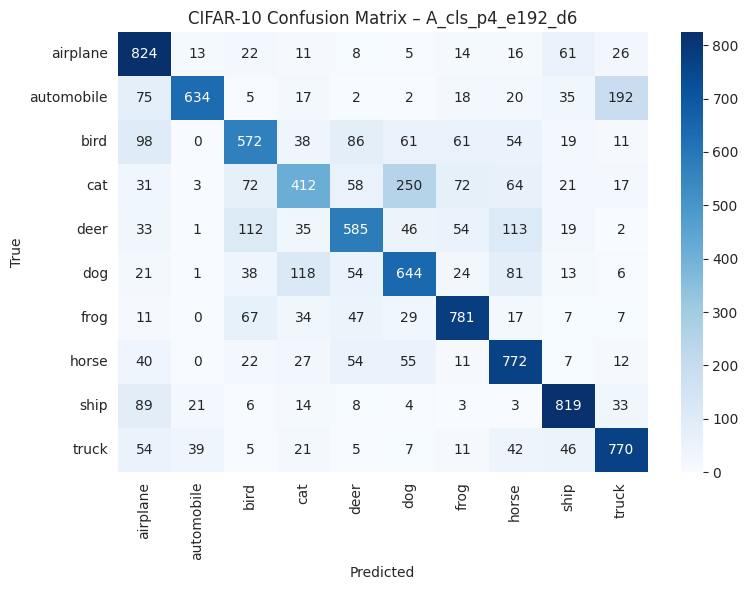

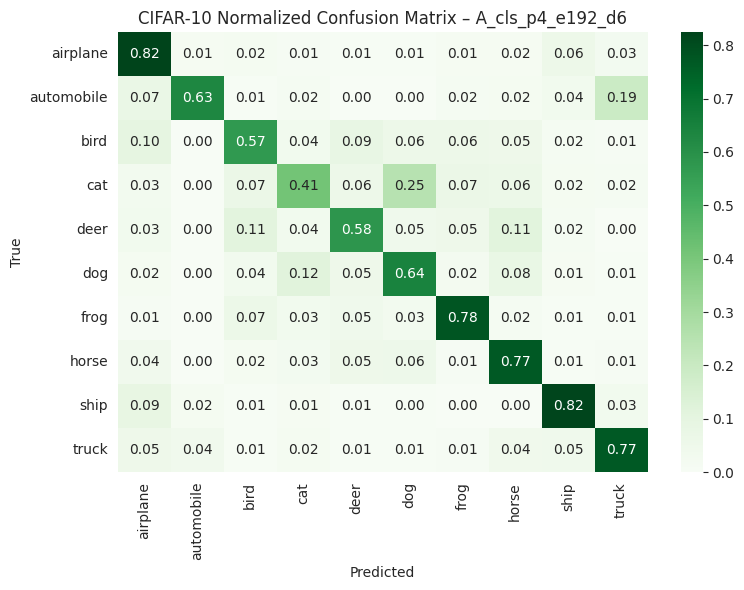

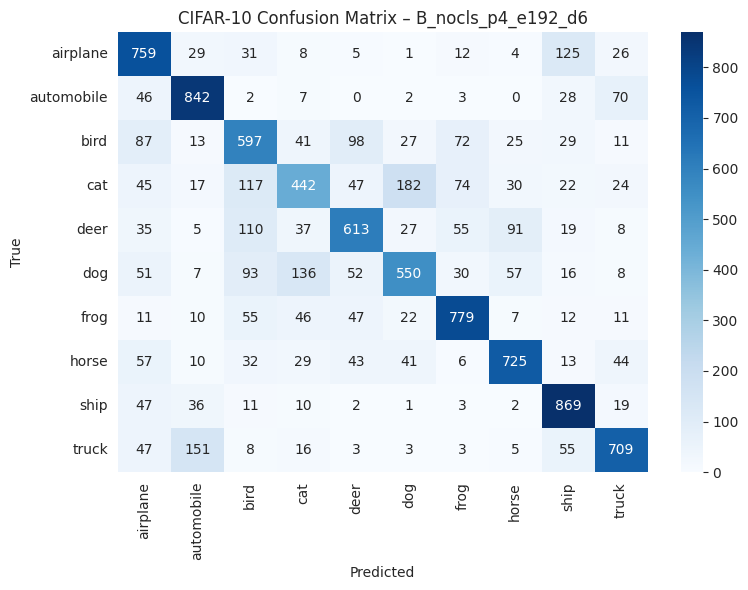

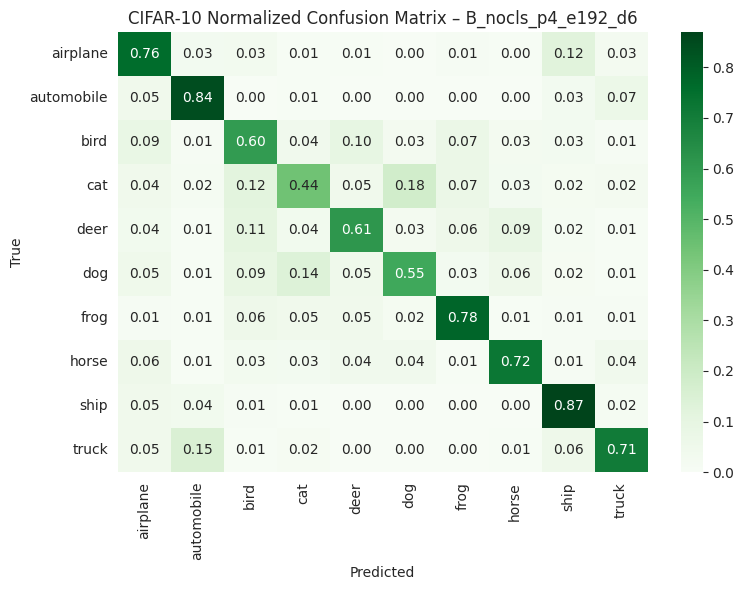

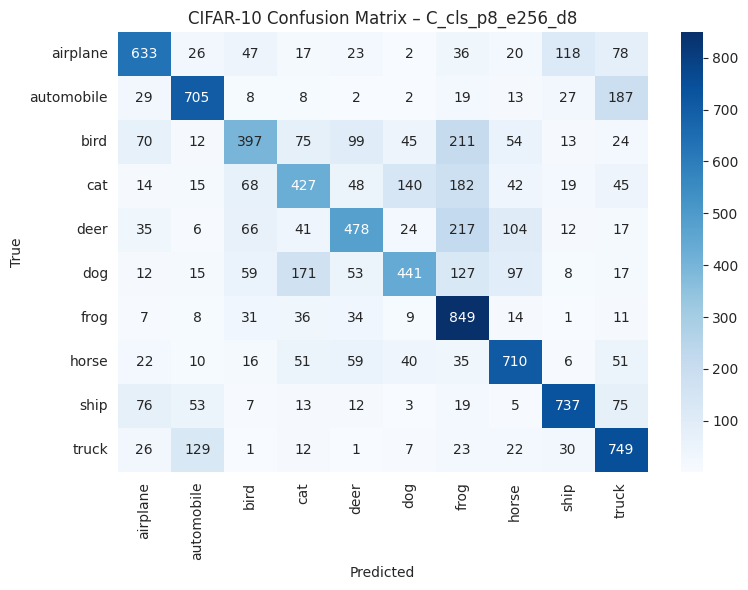

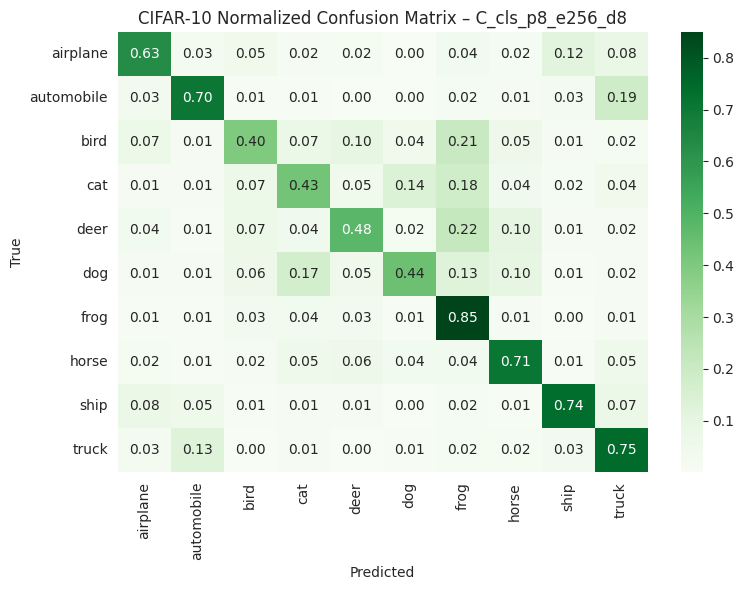

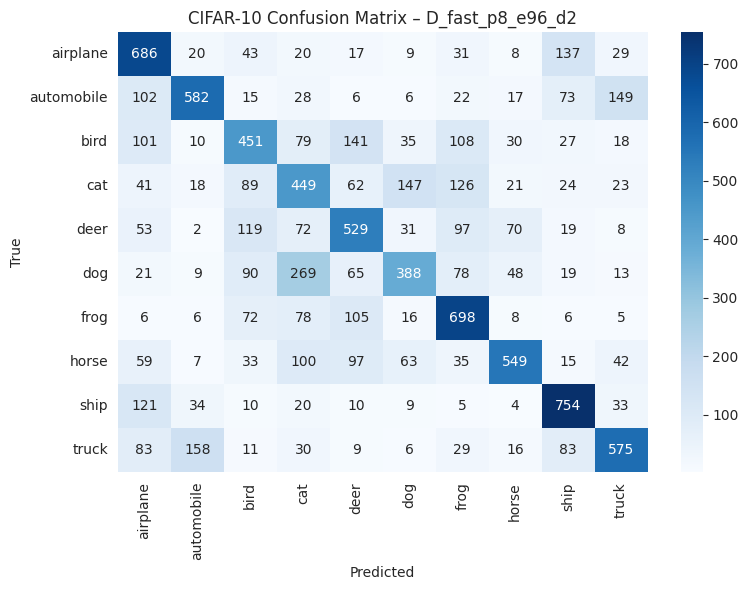

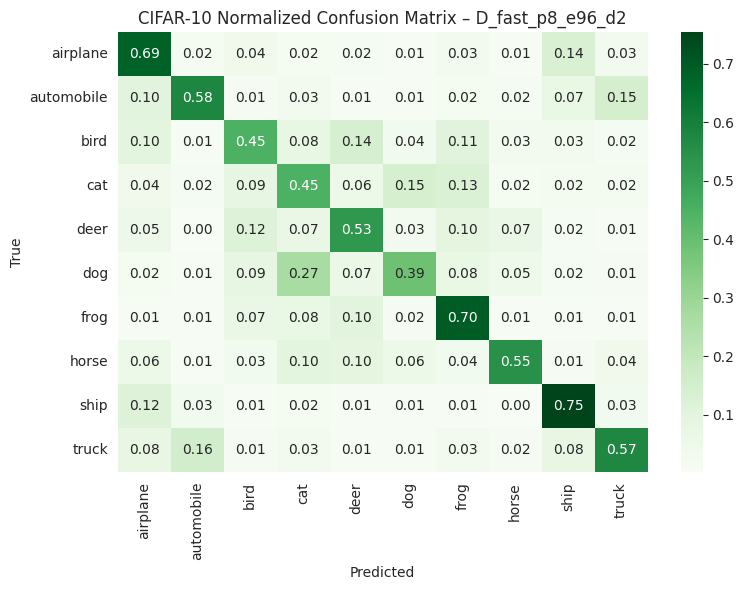


Classification report (best config):

              precision    recall  f1-score   support

    airplane       0.54      0.69      0.60      1000
  automobile       0.69      0.58      0.63      1000
        bird       0.48      0.45      0.47      1000
         cat       0.39      0.45      0.42      1000
        deer       0.51      0.53      0.52      1000
         dog       0.55      0.39      0.45      1000
        frog       0.57      0.70      0.63      1000
       horse       0.71      0.55      0.62      1000
        ship       0.65      0.75      0.70      1000
       truck       0.64      0.57      0.61      1000

    accuracy                           0.57     10000
   macro avg       0.57      0.57      0.56     10000
weighted avg       0.57      0.57      0.56     10000


In [68]:
# === Convert to DataFrame ===
df = pd.DataFrame(results)
df = df.drop_duplicates(subset="name", keep="last")  # keep one per name if repeated
df = df.sort_values("test_acc", ascending=False).reset_index(drop=True)

print("\n=== CIFAR-10 ViT Results ===")
print(df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else str(x)))

# === LaTeX summary table ===
latex_table = df[["name", "patch", "emb", "depth", "heads", "mlp_mul", "use_cls", "lr", "epochs", "test_acc"]].to_latex(
    index=False,
    float_format="%.4f",
    caption="CIFAR-10 Vision Transformer configurations and test accuracy",
    label="tab:cifar10_vit_results",
    escape=False
)
print("\nLaTeX Table:\n")
print(latex_table)

# === Confusion matrix for best model ===
for name in outputs:
    y_true = outputs[name]["y_true"]
    y_pred = outputs[name]["y_pred"]
    
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype(float) / cm.sum(axis=1, keepdims=True)
    
    class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
    
    # --- Plot raw confusion matrix ---
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"CIFAR-10 Confusion Matrix – {name}")
    plt.tight_layout()
    plt.show()
    
    # --- Plot normalized confusion matrix ---
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_norm, annot=True, fmt=".2f", cmap='Greens',
                xticklabels=class_names, yticklabels=class_names)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(f"CIFAR-10 Normalized Confusion Matrix – {name}")
    plt.tight_layout()
    plt.show()

# --- Classification report for best ---
print("\nClassification report (best config):\n")
print(classification_report(y_true, y_pred, target_names=class_names))

## 3.2.4 TODO

* Perform experiments on CIFAR-10 dataset. Observe, that image shapes are (32,32,3)
* Test at least 4 configurations using TF or Pytorch. What can be changed:
  * numbers of transformers blocks
  * embedding dimensions
  * using class tokens (or not)
  * patch size (2,4,8)
* Summarize results in a table.
* Include confusion matrix (use correct labels) and discuss which images were misclassified (e.g. aircrafts taken as frogs?)


# 3.3. Time series

In this section we will use Transformers for multivariate time series forecasting. The synthetic time series from Assignment 2 will be used

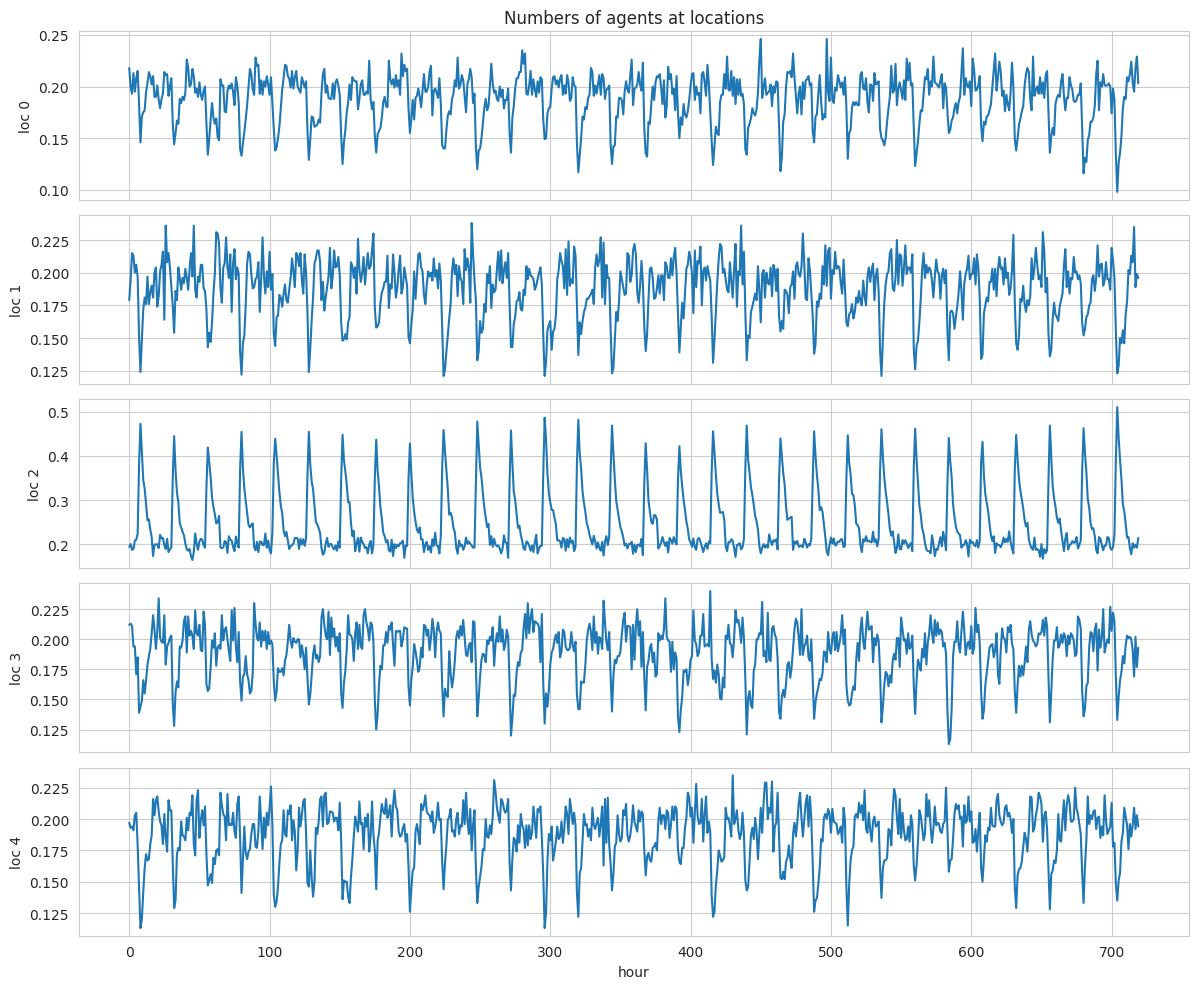

In [69]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

# --- parameters ---
n_agents = 1000
n_locations = 5
center = 2
steps_per_day = 24
n_days = 30
T = steps_per_day * n_days

# --- parameters controlling  moves---
base_move_prob = 0.05
bias_to_center = 0.25
bias_to_home = 0.25
night_suppression = 0.2
random_variation = 0.05

# --- initiation of agnets ---
home = np.random.choice(n_locations, n_agents)
location = home.copy()
x = np.zeros((T, n_locations))

def hour_phase(hour):
    if 7 <= hour < 9:
        return 'morning'
    elif 9 <= hour < 17:
        return 'day'
    elif 17 <= hour < 19:
        return 'evening'
    else:
        return 'night'

# --- main sim loop ---
for t in range(T):
    hour = t % steps_per_day
    phase = hour_phase(hour)

    # basic transition matrix
    P = np.ones((n_locations, n_locations)) * base_move_prob
    np.fill_diagonal(P, 1 - base_move_prob * (n_locations - 1))

    if phase == 'morning':
        P[:, center] += bias_to_center
    elif phase == 'evening':
        for i in range(n_agents):
            P[location[i], home[i]] += bias_to_home
    elif phase == 'night':
        P = 1 - night_suppression + night_suppression * P

    # random perturbations
    P += random_variation * (np.random.rand(*P.shape) - 0.5)
    P = np.clip(P, 0, None)
    P /= P.sum(axis=1, keepdims=True)

    # updating agents locations
    new_locations = []
    for i in range(n_agents):
        loc = location[i]
        probs = P[loc]
        new_loc = np.random.choice(n_locations, p=probs)
        new_locations.append(new_loc)
    location = np.array(new_locations)

    # saving states (with normalization)
    for j in range(n_locations):
        x[t, j] = np.sum(location == j) / n_agents

# --- plots ---
fig, axes = plt.subplots(n_locations, 1, figsize=(12, 2*n_locations), sharex=True)

for j in range(n_locations):
    axes[j].plot(x[:, j], color='tab:blue')
    axes[j].set_ylabel(f"loc {j}")
    axes[j].grid(True)
    if j == 0:
        axes[j].set_title("Numbers of agents at locations")

axes[-1].set_xlabel("hour")
plt.tight_layout()
plt.show()


In [70]:
import pandas as pd

# assume, x has the shape (T, n_locations)
df = pd.DataFrame(x, columns=[f"loc_{j}" for j in range(n_locations)])
df.to_csv("population_timeseries.csv", index_label="t")
df.head()


loc_0  loc_1  loc_2  loc_3  loc_4
0  0.218  0.179  0.194  0.212  0.197
1  0.199  0.195  0.200  0.213  0.193
2  0.193  0.215  0.187  0.211  0.194
3  0.213  0.213  0.189  0.194  0.191
4  0.195  0.200  0.208  0.194  0.203

As previous we will use 24 hours window (past values) to predict values one step ahead. A dataset containing observations $(x_i,y_i)$ where $x_i \in \mathbb{R}^{5 \times 24}$ and $y_i \in \mathbb{R}^{5}$ will be extracted from tthe time series.

In [71]:
import numpy as np

# parameters
window_size = 24  # use last 24 hours to predict one hour ahead
n_features = n_locations

# tworzymy X i y
X = []
y = []

for t in range(T - window_size):
    X.append(df.iloc[t:t+window_size].values)
    y.append(df.iloc[t+window_size].values)

X = np.array(X)  # shape: (samples, window_size, n_features)
y = np.array(y)  # shape: (samples, n_features)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (696, 24, 5)
y shape: (696, 5)


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

**Key point** the time series data must be scaled.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Flatten time dimension for fitting (if your X is [samples, window, features])
X_train_2d = X_train.reshape(-1, X_train.shape[-1])
scaler_X.fit(X_train_2d)

# Scale y as well
scaler_y.fit(y_train)


StandardScaler()

In [74]:
X_train_scaled = scaler_X.transform(X_train_2d).reshape(X_train.shape)
X_test_scaled  = scaler_X.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

y_train_scaled = scaler_y.transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)


## 3.3.1 TensorFlow implementation

**Key points**

* Use sin/cos positional encoding
* Dose not use class token. The last token in the sequence is used in prediction (or mean of token values - commented out `GlobalAveragPooling1D` or all token values)

In [75]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import metrics


# === Hyperparameters ===
window_size = 24
num_features = 5
d_model = 64
num_heads = 4
ff_dim = 128
num_layers = 2

# === Positional Encoding ===

class PositionalEncoding(layers.Layer):
    def __init__(self, maxlen, d_model):
        super().__init__()
        self.maxlen = maxlen
        self.d_model = d_model
        # prepare positional encoding only once (float32)
        pos = tf.cast(tf.range(self.maxlen)[:, tf.newaxis], tf.float32)          # (maxlen, 1)
        i = tf.cast(tf.range(self.d_model)[tf.newaxis, :], tf.float32)          # (1, d_model)
        # frequencies: 1 / (10000^(2*(i//2)/d_model))
        angle_rates = 1.0 / tf.pow(10000.0, (2.0 * tf.floor(i / 2.0)) / tf.cast(self.d_model, tf.float32))
        angle_rads = pos * angle_rates  # (maxlen, d_model)

        # sin for even indexes, cos for odd
        sines = tf.sin(angle_rads[:, 0::2])    # (maxlen, d_model/2)
        cosines = tf.cos(angle_rads[:, 1::2])  # (maxlen, d_model/2)

        # arange as [sin0, cos0, sin1, cos1, ...]
        pos_encoding = tf.reshape(tf.stack([sines, cosines], axis=-1), (self.maxlen, self.d_model))
        pos_encoding = pos_encoding[tf.newaxis, ...]  # (1, maxlen, d_model)
        self.pos_encoding = tf.cast(pos_encoding, tf.float32)

    def call(self, x):
        # x: (batch, seq_len, d_model_in)
        seq_len = tf.shape(x)[1]
        # cast position dtype p dtype of input and add
        return x + tf.cast(self.pos_encoding[:, :seq_len, :], x.dtype)

# === Transformer Block ===
def transformer_block(inputs):
    attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=d_model)(inputs, inputs)
    attn_output = layers.Dropout(0.1)(attn_output)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    ffn = tf.keras.Sequential([
        layers.Dense(ff_dim, activation='relu'),
        layers.Dense(d_model),
    ])
    ffn_output = ffn(out1)
    ffn_output = layers.Dropout(0.1)(ffn_output)
    return layers.LayerNormalization(epsilon=1e-6)(out1 + ffn_output)

# === Full Model ===
inputs = layers.Input(shape=(window_size, num_features))

# Project features to model dimension
x = layers.Dense(d_model)(inputs)
x = PositionalEncoding(window_size, d_model)(x)

# Apply N transformer layers
for _ in range(num_layers):
    x = transformer_block(x)

# Use the last token
last = layers.Lambda(lambda t: t[:, -1, :])(x)
outputs = layers.Dense(num_features)(last)

# Or pool across the time dimension
# x = layers.GlobalAveragePooling1D()(x)
# outputs = layers.Dense(num_features)(x)


# Or use the whole sequence
# x = layers.Flatten()(x)
# outputs = layers.Dense(num_features)(x)

model = models.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=[
                metrics.MeanAbsoluteError(name='mae'),
                metrics.RootMeanSquaredError(name='rmse'),
                metrics.R2Score(name='r2')])

model.summary()


Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_16      │ (None, 24, 5)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 24, 64)    │        384 │ input_layer_16[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_encodin… │ (None, 24, 64)    │          0 │ dense_56[0][0]    │
│ (PositionalEncodin… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 64)    │     66,368 │ positional_encod… │
│ (MultiHeadAttentio… │                   │            │ positional_encod… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_47          │ (None, 24, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_45 (Add)        │ (None, 24, 64)    │          0 │ positional_encod… │
│                     │                   │            │ dropout_47[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_45[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 24, 64)    │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 24, 64)    │          0 │ sequential_3[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_46 (Add)        │ (None, 24, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_48[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_46[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 24, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 24, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_47 (Add)        │ (None, 24, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_50[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 24, 64)    │        128 │ add_47[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 24, 64)    │     16,576 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_51          │ (None, 24, 64)    │          0 │ sequential_4[0][… │
│ (Dropout)           │                   │            │                 

 Total params: 167,109 (652.77 KB)

 Trainable params: 167,109 (652.77 KB)

 Non-trainable params: 0 (0.00 B)

In [77]:
hist = model.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50,
    batch_size=32,
    verbose=0
)

In [78]:
loss, mae,rmse,r2 = model.evaluate(X_test_scaled, y_test_scaled)
print(f"Test MAE: {mae} Test RMSE: {rmse} Test r2 {r2}" )


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3049 - mae: 0.4273 - r2: 0.7014 - rmse: 0.5522  
Test MAE: 0.42725011706352234 Test RMSE: 0.5522074103355408 Test r2 0.701414942741394


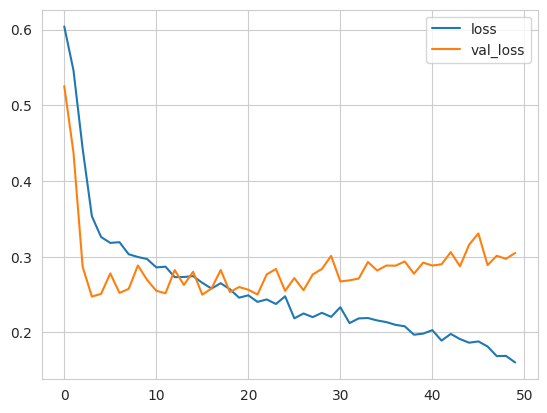

In [79]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [80]:
hist.history.keys()

dict_keys(['loss', 'mae', 'r2', 'rmse', 'val_loss', 'val_mae', 'val_r2', 'val_rmse'])

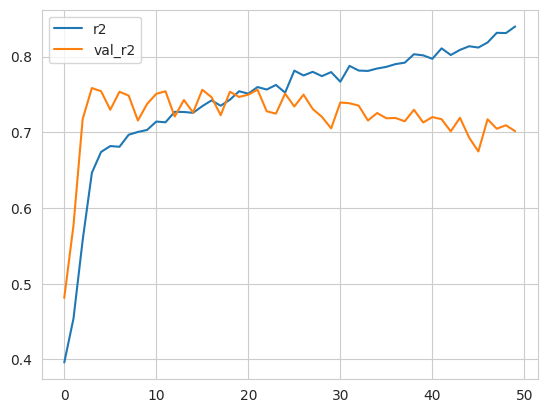

In [81]:
plt.plot(hist.history['r2'], label='r2')
plt.plot(hist.history['val_r2'], label='val_r2')
plt.legend()
plt.show()

In [82]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

from sklearn.metrics import r2_score, mean_squared_error
print("R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 241ms/step
R²: 0.7014150238501464
MSE: 0.00020889279550642022


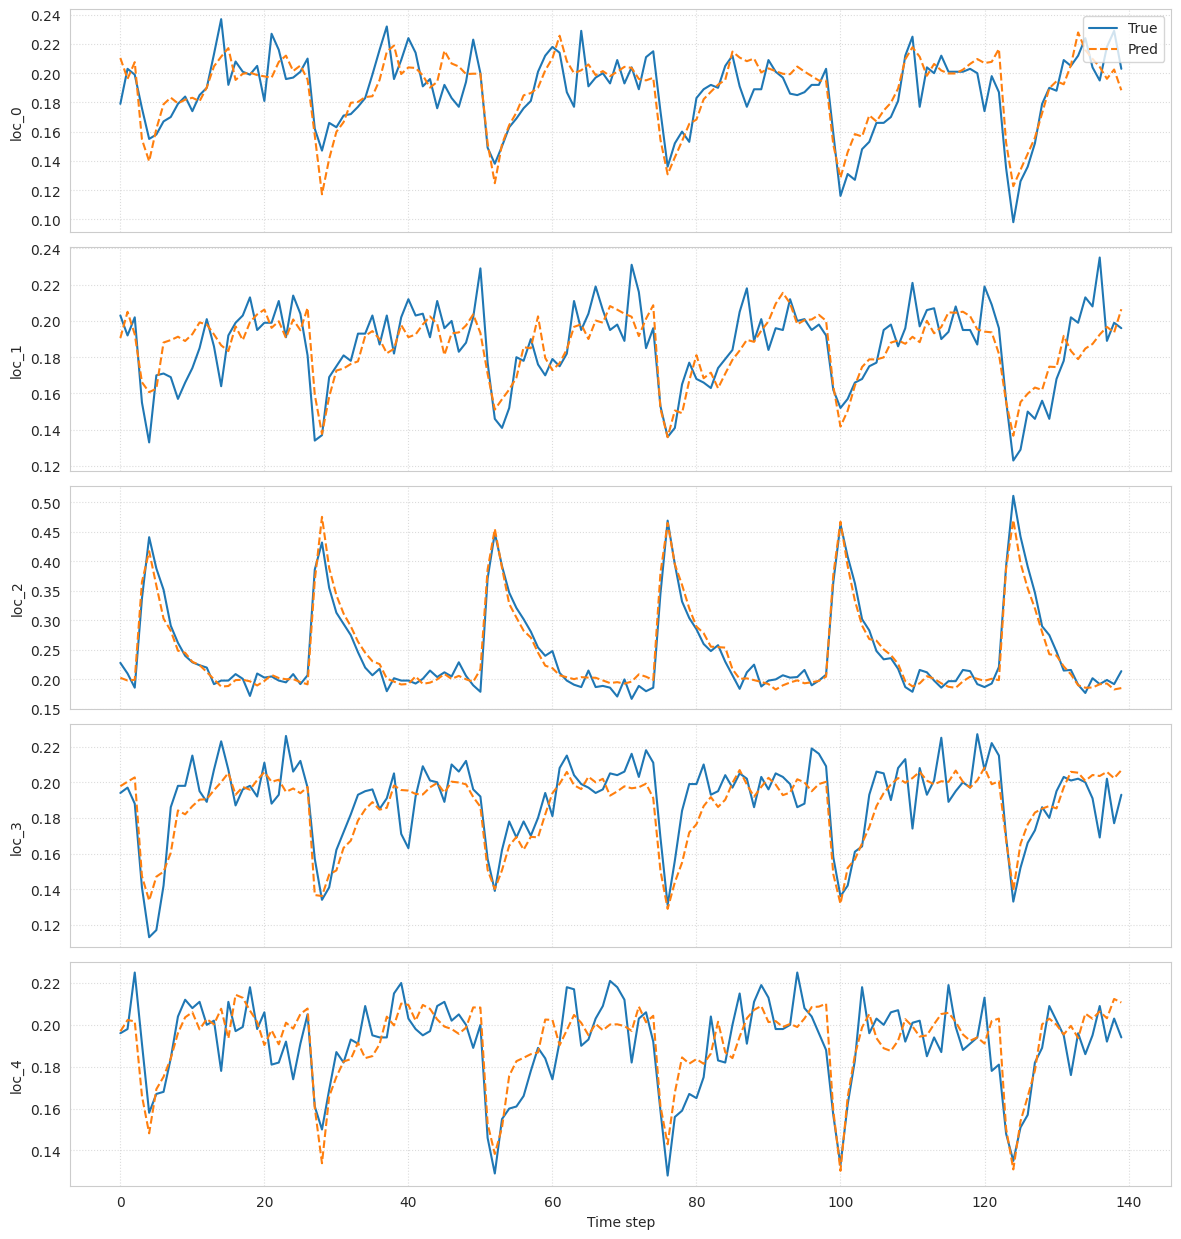

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# assume you already have:
# y_test: shape (N, 5)
# y_pred: shape (N, 5)

n_features = y_test.shape[1]
timesteps = np.arange(len(y_test))

fig, axes = plt.subplots(n_features, 1, figsize=(12, 2.5 * n_features), sharex=True)

for i in range(n_features):
    ax = axes[i]
    ax.plot(timesteps, y_test[:, i], label='True', linewidth=1.5)
    ax.plot(timesteps, y_pred[:, i], label='Pred', linestyle='--', linewidth=1.5)
    ax.set_ylabel(f'loc_{i}')
    ax.grid(True, linestyle=':', alpha=0.7)
    if i == 0:
        ax.legend(loc='upper right')
    if i == n_features - 1:
        ax.set_xlabel('Time step')

plt.tight_layout()
plt.show()


## 3.3.2 PyTorch implementation

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# --- Configurable hyperparameters controlling model complexity ---
d_model = 64          # embedding dimension
num_heads = 4         # number of attention heads
num_layers = 4        # number of transformer encoder layers
ff_dim = 128          # feed-forward hidden dimension
dropout = 0.1         # dropout rate
batch_size = 32
epochs = 50
lr = 1e-3

# --- Prepare data ---
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X_train = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train = torch.tensor(y_train_scaled, dtype=torch.float32)
X_val = torch.tensor(X_test_scaled, dtype=torch.float32)
y_val = torch.tensor(y_test_scaled, dtype=torch.float32)

train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=batch_size, shuffle=False)


In [85]:
class TimeSeriesTransformer(nn.Module):
    def __init__(self, input_dim, d_model, n_heads, n_layers, ff_dim, dropout=0.1):
        super().__init__()

        # Project input features (e.g. 5 → 64)
        self.input_proj = nn.Linear(input_dim, d_model)

        # Positional encoding
        self.pos_encoding = self._generate_pos_encoding(500, d_model)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=d_model,
            nhead=n_heads,
            dim_feedforward=ff_dim,
            dropout=dropout,
            batch_first=True,
            activation='gelu'
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=n_layers)

        # Regression head
        self.head = nn.Sequential(
            nn.LayerNorm(d_model),
            nn.Linear(d_model, 64),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(64, input_dim)
        )

    def _generate_pos_encoding(self, max_len, d_model):
        """Precompute sinusoidal positional encodings"""
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-torch.log(torch.tensor(10000.0)) / d_model))
        pe = torch.zeros(max_len, d_model)
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        return pe

    def forward(self, x):
        seq_len = x.size(1)
        x = self.input_proj(x) + self.pos_encoding[:, :seq_len, :].to(x.device)
        x = self.transformer(x)
        x = x.mean(dim=1)  # Global average pooling over sequence
        return self.head(x)


In [86]:
model = TimeSeriesTransformer(
    input_dim=X_train.shape[2],
    d_model=d_model,
    n_heads=num_heads,
    n_layers=num_layers,
    ff_dim=ff_dim,
    dropout=dropout
).to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

def r2_score(y_true, y_pred):
    ss_res = torch.sum((y_true - y_pred) ** 2)
    ss_tot = torch.sum((y_true - torch.mean(y_true)) ** 2)
    return 1 - ss_res / ss_tot

for epoch in range(epochs):
    model.train()
    train_loss = 0
    for Xb, yb in train_loader:
        Xb, yb = Xb.to(device), yb.to(device)
        optimizer.zero_grad()
        preds = model(Xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * Xb.size(0)

    model.eval()
    val_loss, val_r2 = 0, 0
    with torch.no_grad():
        for Xb, yb in val_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            preds = model(Xb).squeeze()
            val_loss += criterion(preds, yb).item() * Xb.size(0)
            val_r2 += r2_score(yb, preds).item() * Xb.size(0)

    train_loss /= len(train_loader.dataset)
    val_loss /= len(val_loader.dataset)
    val_r2 /= len(val_loader.dataset)

    print(f"Epoch {epoch+1:02d} | Train loss: {train_loss:.4f} | "
          f"Val loss: {val_loss:.4f} | Val R2: {val_r2:.4f}")


Epoch 01 | Train loss: 1.0075 | Val loss: 1.0314 | Val R2: 0.0222
Epoch 02 | Train loss: 0.7828 | Val loss: 0.5735 | Val R2: 0.4589
Epoch 03 | Train loss: 0.5760 | Val loss: 0.4591 | Val R2: 0.5416
Epoch 04 | Train loss: 0.3928 | Val loss: 0.3534 | Val R2: 0.6387
Epoch 05 | Train loss: 0.3606 | Val loss: 0.3425 | Val R2: 0.6444
Epoch 06 | Train loss: 0.3437 | Val loss: 0.3233 | Val R2: 0.6637
Epoch 07 | Train loss: 0.3310 | Val loss: 0.3273 | Val R2: 0.6640
Epoch 08 | Train loss: 0.3284 | Val loss: 0.3176 | Val R2: 0.6709
Epoch 09 | Train loss: 0.3127 | Val loss: 0.3174 | Val R2: 0.6681
Epoch 10 | Train loss: 0.3146 | Val loss: 0.3079 | Val R2: 0.6775
Epoch 11 | Train loss: 0.3052 | Val loss: 0.3406 | Val R2: 0.6495
Epoch 12 | Train loss: 0.3018 | Val loss: 0.3237 | Val R2: 0.6638
Epoch 13 | Train loss: 0.2966 | Val loss: 0.3157 | Val R2: 0.6753
Epoch 14 | Train loss: 0.2871 | Val loss: 0.3214 | Val R2: 0.6695
Epoch 15 | Train loss: 0.2783 | Val loss: 0.2983 | Val R2: 0.6882
Epoch 16 |

In [87]:
import torch
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# --- tryb ewaluacji ---
model.eval()

# --- zbieramy predykcje ---
y_true_list = []
y_pred_list = []

with torch.no_grad():
    for Xb, yb in val_loader:
        Xb = Xb.to(device)
        preds = model(Xb)
        y_true_list.append(yb.cpu().numpy())
        y_pred_list.append(preds.cpu().numpy())

# --- składamy w jeden array ---
y_true_scaled = np.vstack(y_true_list)
y_pred_scaled = np.vstack(y_pred_list)

# --- odwrotna transformacja ---
y_true = scaler_y.inverse_transform(y_true_scaled)
y_pred = scaler_y.inverse_transform(y_pred_scaled)

# --- metryki ---
r2 = r2_score(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.6f}")


R²: 0.6907
MSE: 0.000231


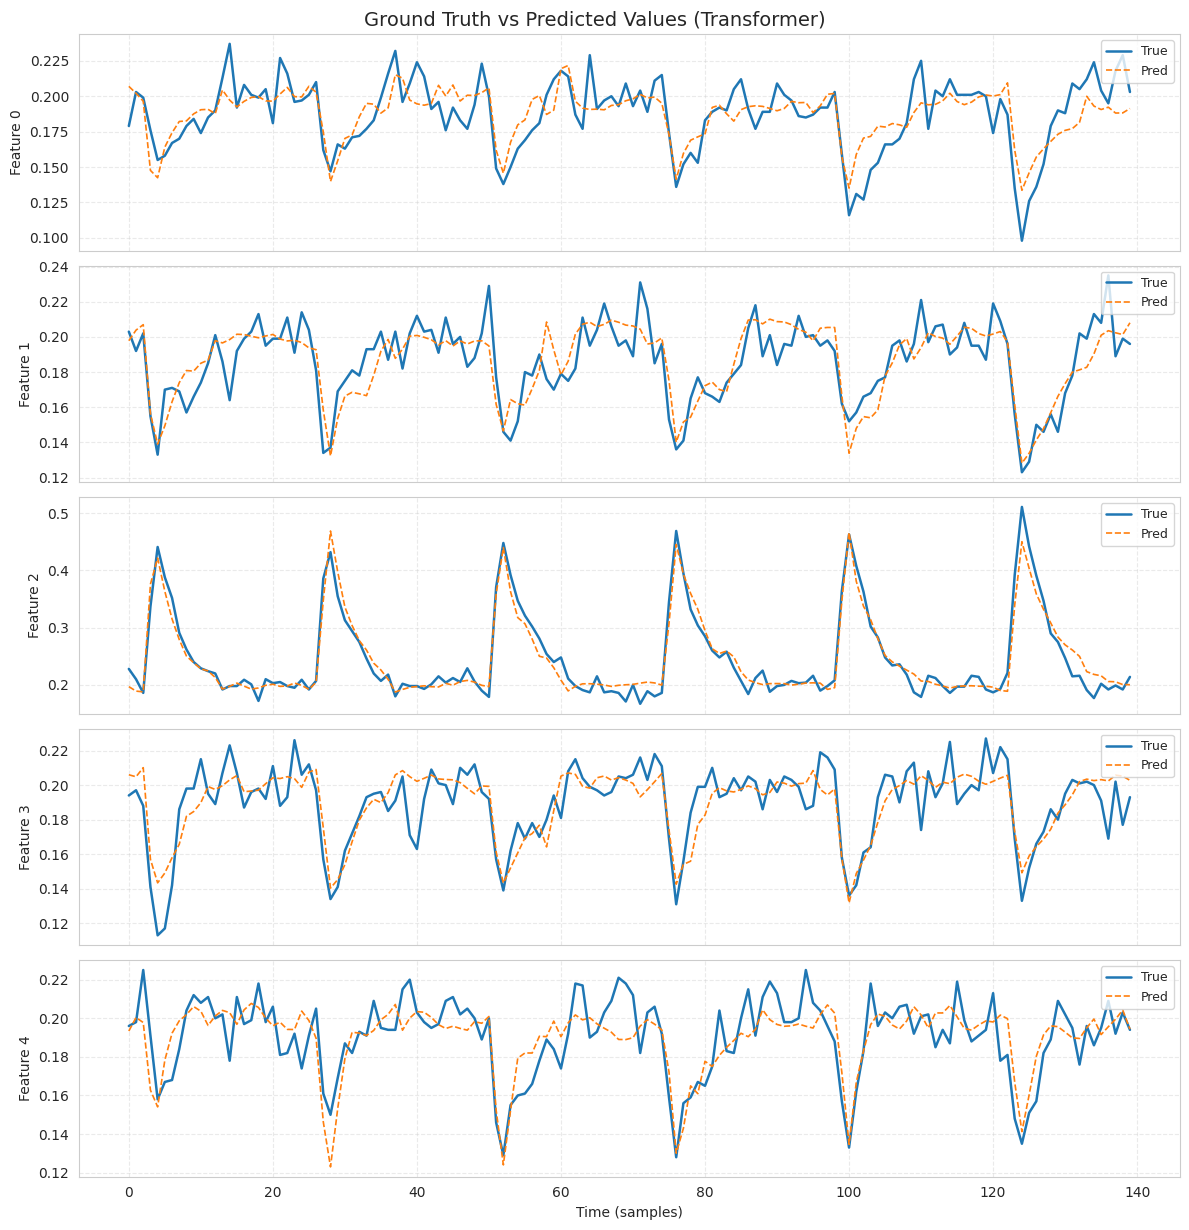

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Assume y_true and y_pred are numpy arrays of shape (n_samples, 5)
n_features = y_true.shape[1]
time = np.arange(len(y_true))  # x-axis index (could be timestamps if you have them)

fig, axes = plt.subplots(n_features, 1, figsize=(12, 2.5 * n_features), sharex=True)

for i in range(n_features):
    ax = axes[i]
    ax.plot(time, y_true[:, i], label="True", lw=1.8)
    ax.plot(time, y_pred[:, i], label="Pred", lw=1.2, linestyle='--')
    ax.set_ylabel(f"Feature {i}")
    ax.grid(True, linestyle='--', alpha=0.4)
    ax.legend(loc="upper right", fontsize=9)

axes[-1].set_xlabel("Time (samples)")
fig.suptitle("Ground Truth vs Predicted Values (Transformer)", fontsize=14, y=0.98)
plt.tight_layout()
plt.show()


In [114]:
def train_eval_one_config(
    X_train_scaled, y_train_scaled,
    X_val_scaled,   y_val_scaled,
    scaler_y,
    *,
    d_model=64, num_heads=4, num_layers=4, ff_dim=128,
    dropout=0.1, batch_size=32, epochs=50, lr=1e-3,
    max_pos_len=2048,  # headroom for longest window/seq
    plot=True
):
    import time as pytime
    import numpy as np
    import torch
    import torch.nn as nn
    import torch.optim as optim
    from torch.utils.data import DataLoader, TensorDataset
    from sklearn.metrics import r2_score as sk_r2, mean_squared_error
    import matplotlib.pyplot as plt

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # --- Data ---
    X_train = torch.as_tensor(X_train_scaled, dtype=torch.float32, device=device)
    y_train = torch.as_tensor(y_train_scaled, dtype=torch.float32, device=device)
    X_val   = torch.as_tensor(X_val_scaled,   dtype=torch.float32, device=device)
    y_val   = torch.as_tensor(y_val_scaled,   dtype=torch.float32, device=device)

    train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(TensorDataset(X_val,   y_val),   batch_size=batch_size, shuffle=False)

    # --- Model with robust positional encoding ---
    class TimeSeriesTransformer(nn.Module):
        def __init__(self, input_dim, d_model, n_heads, n_layers, ff_dim, dropout=0.1, max_len=2048):
            super().__init__()
            assert d_model % n_heads == 0, "d_model must be divisible by num_heads"
            self.d_model = d_model
            self.input_proj = nn.Linear(input_dim, d_model)

            # PE buffer, regenerated as needed
            self.register_buffer("pos_encoding", self._build_pe(max_len, d_model), persistent=False)

            enc_layer = nn.TransformerEncoderLayer(
                d_model=d_model, nhead=n_heads, dim_feedforward=ff_dim,
                dropout=dropout, activation='gelu', batch_first=True
            )
            self.encoder = nn.TransformerEncoder(enc_layer, num_layers=n_layers)
            self.head = nn.Sequential(
                nn.LayerNorm(d_model),
                nn.Linear(d_model, 64),
                nn.GELU(),
                nn.Dropout(dropout),
                nn.Linear(64, input_dim)  # multi-target regression per sample
            )

        def _build_pe(self, max_len, d_model, dtype=torch.float32, device=None):
            pos = torch.arange(max_len, dtype=dtype, device=device).unsqueeze(1)
            div = torch.exp(torch.arange(0, d_model, 2, dtype=dtype, device=device)
                            * (-torch.log(torch.tensor(10000.0, dtype=dtype, device=device)) / d_model))
            pe = torch.zeros(max_len, d_model, dtype=dtype, device=device)
            pe[:, 0::2] = torch.sin(pos * div)
            pe[:, 1::2] = torch.cos(pos * div)
            return pe.unsqueeze(0)  # (1, L, D)

        def ensure_pe(self, L, device, dtype):
            need_new = (self.pos_encoding is None) or (self.pos_encoding.size(1) < L) or (self.pos_encoding.size(2) != self.d_model)
            if need_new:
                self.pos_encoding = self._build_pe(max(L, self.pos_encoding.size(1) if self.pos_encoding is not None else L),
                                                   self.d_model, dtype=dtype, device=device)

        def forward(self, x):
            # x: (B, T, F)
            B, T, _ = x.shape
            x = self.input_proj(x)                    # (B, T, D)
            self.ensure_pe(T, x.device, x.dtype)
            pe = self.pos_encoding[:, :T, :].to(device=x.device, dtype=x.dtype)
            x = x + pe
            x = self.encoder(x)                       # (B, T, D)
            x = x.mean(dim=1)                         # GAP over time
            return self.head(x)                       # (B, F_out)

    model = TimeSeriesTransformer(
        input_dim=X_train.shape[2],
        d_model=d_model, n_heads=num_heads, n_layers=num_layers, ff_dim=ff_dim,
        dropout=dropout, max_len=max_pos_len
    ).to(device)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # --- Train ---
    for epoch in range(1, epochs + 1):
        model.train()
        tr_sum = 0.0
        for Xb, yb in train_loader:
            optimizer.zero_grad(set_to_none=True)
            preds = model(Xb)                         # (B, F)
            loss = criterion(preds, yb)
            loss.backward()
            optimizer.step()
            tr_sum += loss.item() * Xb.size(0)

        model.eval()
        va_sum = 0.0
        with torch.no_grad():
            for Xb, yb in val_loader:
                preds = model(Xb)
                va_sum += criterion(preds, yb).item() * Xb.size(0)

        tr_loss = tr_sum / len(train_loader.dataset)
        val_loss = va_sum / len(val_loader.dataset)
        if epoch == 1 or epoch == epochs:
            print(f"Epoch {epoch:02d} | Train {tr_loss:.4f} | Val {val_loss:.4f}")

    # --- Collect predictions (scaled) ---
    model.eval()
    y_true_s, y_pred_s = [], []
    with torch.no_grad():
        for Xb, yb in val_loader:
            preds = model(Xb)
            y_true_s.append(yb.detach().cpu().numpy())
            y_pred_s.append(preds.detach().cpu().numpy())
    y_true_s = np.vstack(y_true_s)
    y_pred_s = np.vstack(y_pred_s)

    # --- Inverse scale and metrics ---
    y_true = scaler_y.inverse_transform(y_true_s)
    y_pred = scaler_y.inverse_transform(y_pred_s)

    r2  = sk_r2(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.6f}")

    # --- Plot (optional) ---
    if plot:
        n_features = y_true.shape[1]
        t_idx = np.arange(len(y_true))
        fig, axes = plt.subplots(n_features, 1, figsize=(12, 2.4 * n_features), sharex=True)
        if n_features == 1:
            axes = [axes]
        for i, ax in enumerate(axes):
            ax.plot(t_idx, y_true[:, i], label="True", lw=1.8)
            ax.plot(t_idx, y_pred[:, i], label="Pred", lw=1.2, ls='--')
            ax.set_ylabel(f"Feature {i}")
            ax.grid(True, ls='--', alpha=0.4)
            if i == 0:
                ax.legend(loc="upper right", fontsize=9)
        axes[-1].set_xlabel("Validation samples")
        fig.suptitle("Ground Truth vs Predicted Values (Transformer)", fontsize=14, y=0.98)
        plt.tight_layout()
        plt.show()

    return model, {"r2": float(r2), "mse": float(mse), "val_loss": float(val_loss)}


In [122]:
configs = [
    {"name":"A_win32_d64_h4_L4_ff128",  "window":32, "d_model":64,  "n_heads":4, "n_layers":4, "ff_dim":128, "dropout":0.1, "epochs":15, "lr":1e-3, "batch_size":64},
    {"name":"B_win32_d96_h6_L4_ff192",  "window":32, "d_model":96,  "n_heads":6, "n_layers":4, "ff_dim":192, "dropout":0.1, "epochs":15, "lr":1e-3, "batch_size":64},
    {"name":"C_win48_d64_h4_L6_ff256",  "window":48, "d_model":64,  "n_heads":4, "n_layers":6, "ff_dim":256, "dropout":0.1, "epochs":15, "lr":8e-4, "batch_size":64},
    {"name":"D_win64_d128_h8_L4_ff256", "window":64, "d_model":128, "n_heads":8, "n_layers":4, "ff_dim":256, "dropout":0.1, "epochs":12, "lr":8e-4, "batch_size":64},
    {"name":"E_win64_d96_h6_L6_ff384",  "window":64, "d_model":96,  "n_heads":6, "n_layers":6, "ff_dim":384, "dropout":0.1, "epochs":12, "lr":8e-4, "batch_size":64},
    {"name":"F_win24_d48_h4_L3_ff128",  "window":24, "d_model":48,  "n_heads":4, "n_layers":3, "ff_dim":128, "dropout":0.1, "epochs":12, "lr":1e-3, "batch_size":64},  # fast baseline
    {"name":"G_win48_d128_h8_L3_ff256", "window":48, "d_model":128, "n_heads":8, "n_layers":3, "ff_dim":256, "dropout":0.1, "epochs":12, "lr":1e-3, "batch_size":64},
    {"name":"H_win32_d64_h8_L4_ff256",  "window":32, "d_model":64,  "n_heads":8, "n_layers":4, "ff_dim":256, "dropout":0.1, "epochs":15, "lr":1e-3, "batch_size":64},
]
for c in configs:
    assert c["d_model"] % c["n_heads"] == 0, f"{c['name']}: d_model must be divisible by n_heads"


=== Running A_win32_d64_h4_L4_ff128 ===
Epoch 01 | Train 0.9791 | Val 0.9041
Epoch 15 | Train 0.3167 | Val 0.3364
R²: 0.6713
MSE: 0.000274


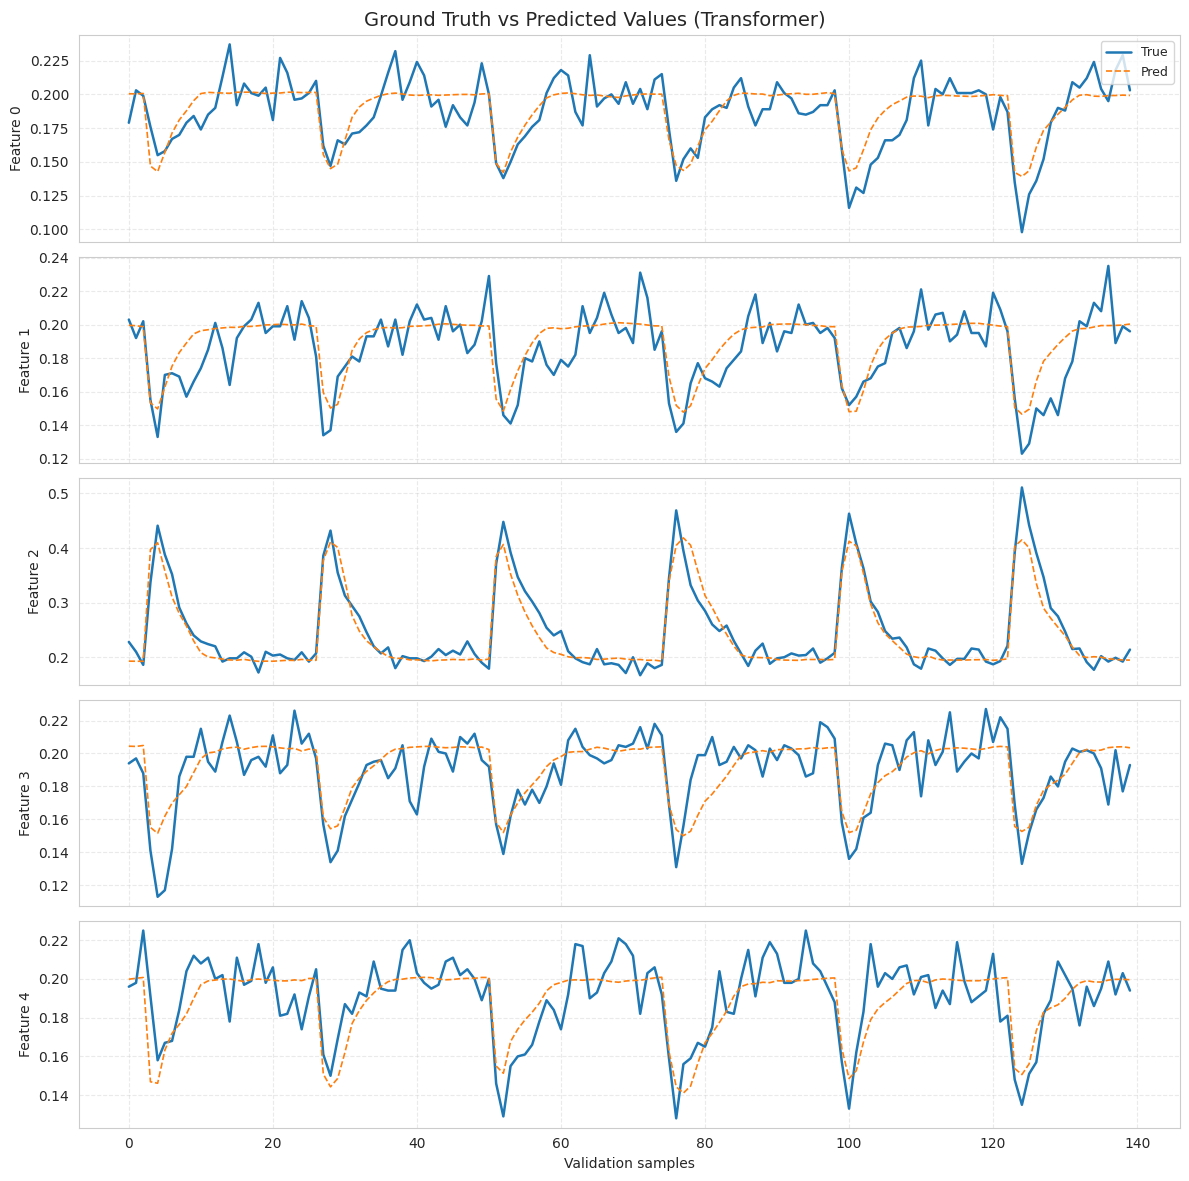


=== Running B_win32_d96_h6_L4_ff192 ===
Epoch 01 | Train 0.9976 | Val 0.9447
Epoch 15 | Train 0.3046 | Val 0.3396
R²: 0.6707
MSE: 0.000276


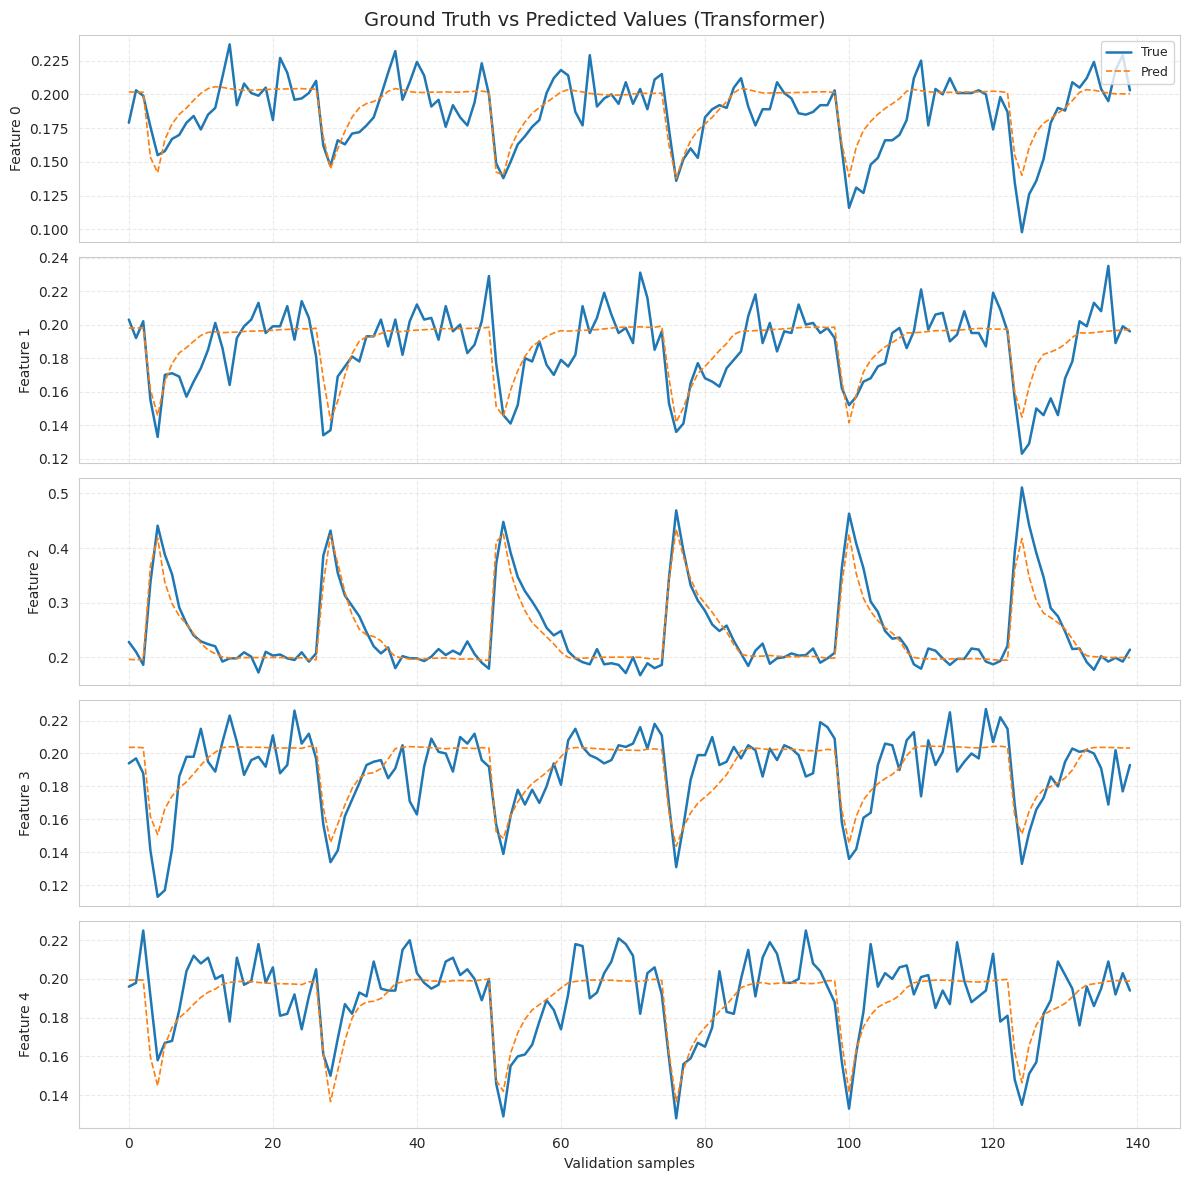


=== Running C_win48_d64_h4_L6_ff256 ===
Epoch 01 | Train 1.0190 | Val 1.0500
Epoch 15 | Train 0.3077 | Val 0.3226
R²: 0.6864
MSE: 0.000248


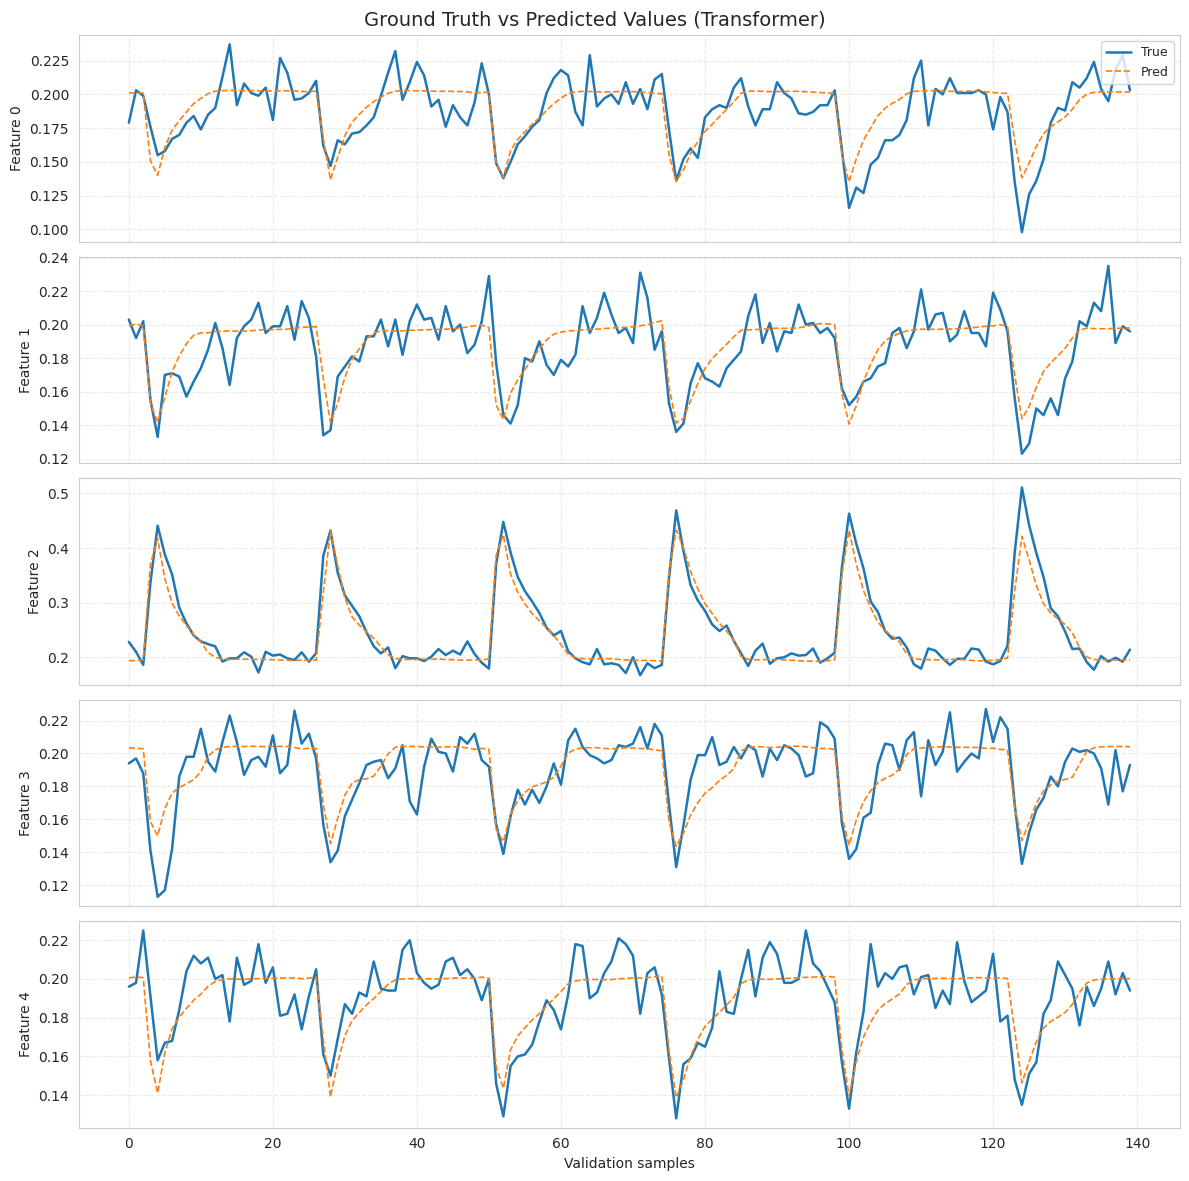


=== Running D_win64_d128_h8_L4_ff256 ===
Epoch 01 | Train 1.0376 | Val 1.0404
Epoch 12 | Train 0.3086 | Val 0.2999
R²: 0.7060
MSE: 0.000208


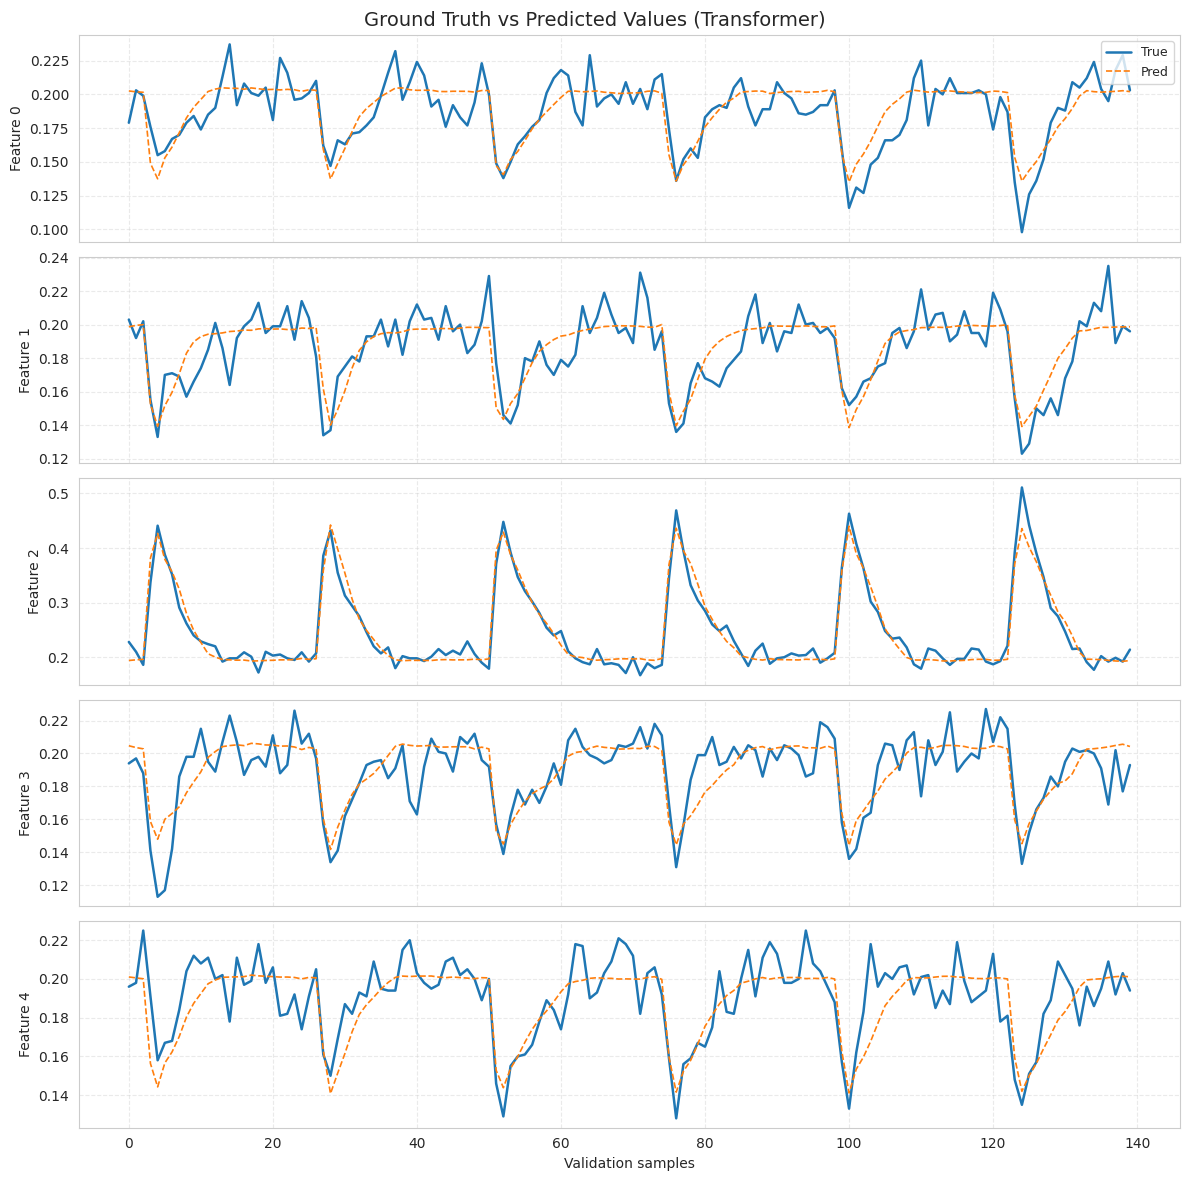


=== Running E_win64_d96_h6_L6_ff384 ===
Epoch 01 | Train 1.0162 | Val 1.0514
Epoch 12 | Train 0.3357 | Val 0.3112
R²: 0.6964
MSE: 0.000230


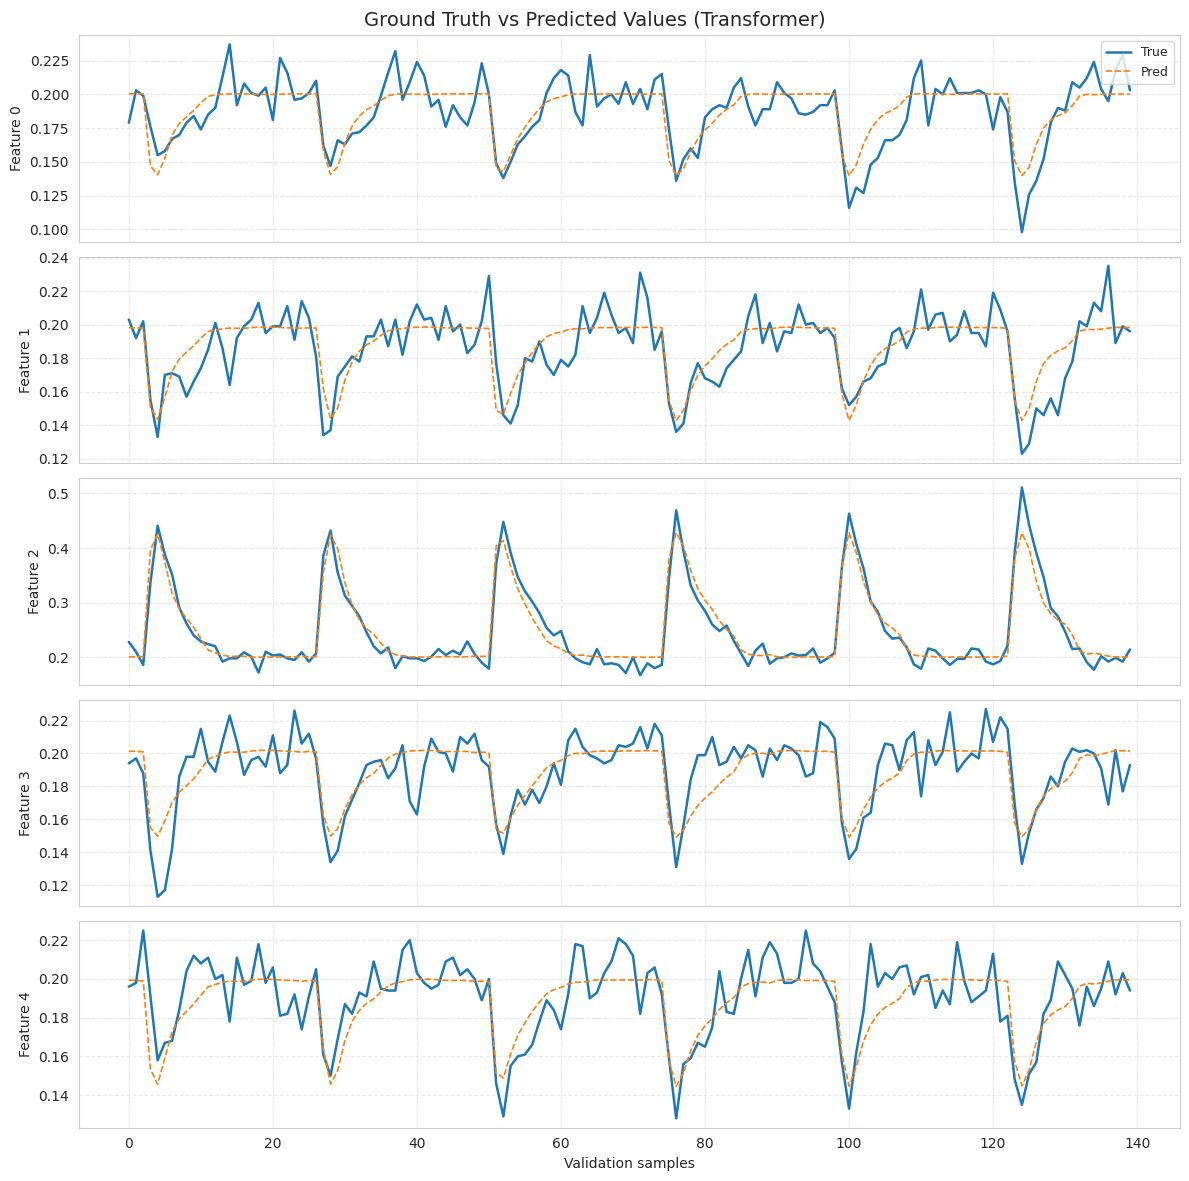


=== Running F_win24_d48_h4_L3_ff128 ===
Epoch 01 | Train 1.0037 | Val 1.0462
Epoch 12 | Train 0.3464 | Val 0.3716
R²: 0.6396
MSE: 0.000330


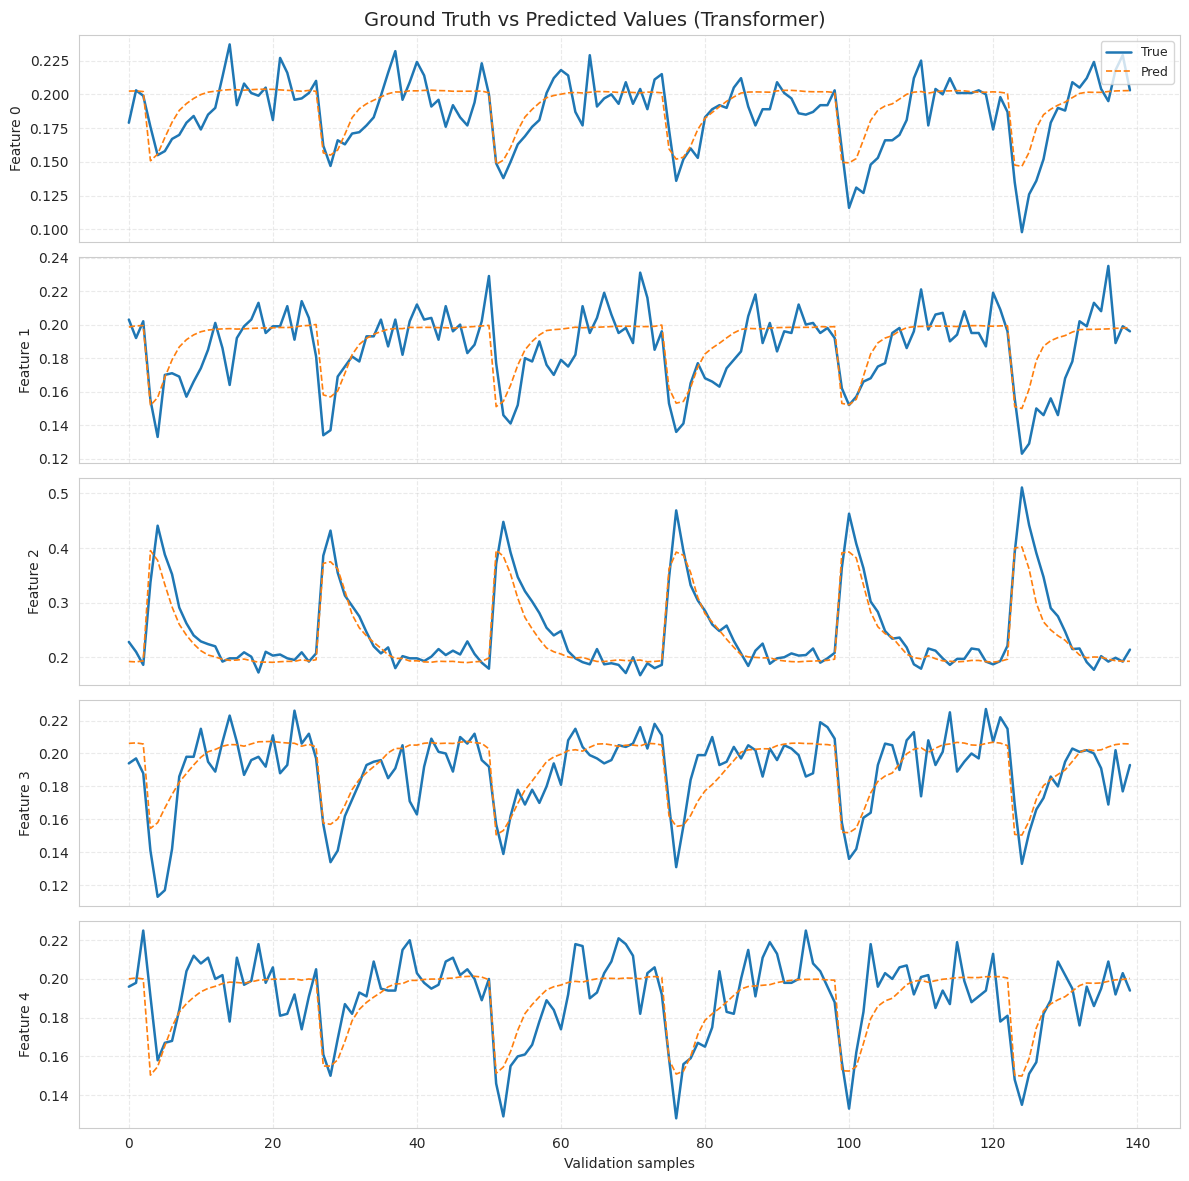


=== Running G_win48_d128_h8_L3_ff256 ===
Epoch 01 | Train 0.9987 | Val 0.9208
Epoch 12 | Train 0.2730 | Val 0.2889
R²: 0.7199
MSE: 0.000222


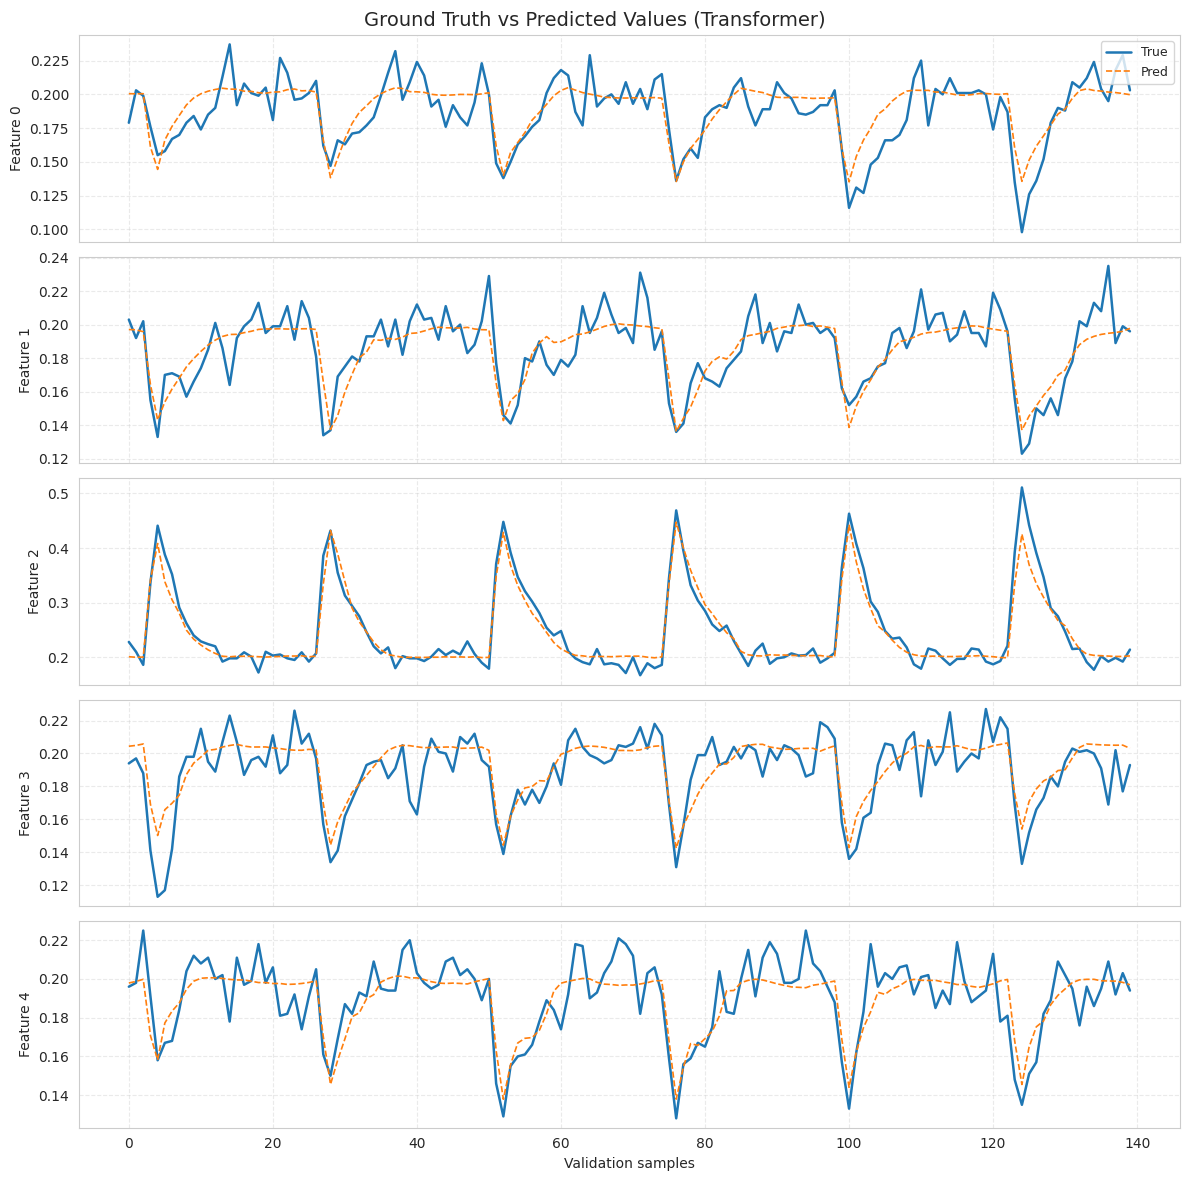


=== Running H_win32_d64_h8_L4_ff256 ===
Epoch 01 | Train 1.0043 | Val 1.0011
Epoch 15 | Train 0.3086 | Val 0.3079
R²: 0.6994
MSE: 0.000225


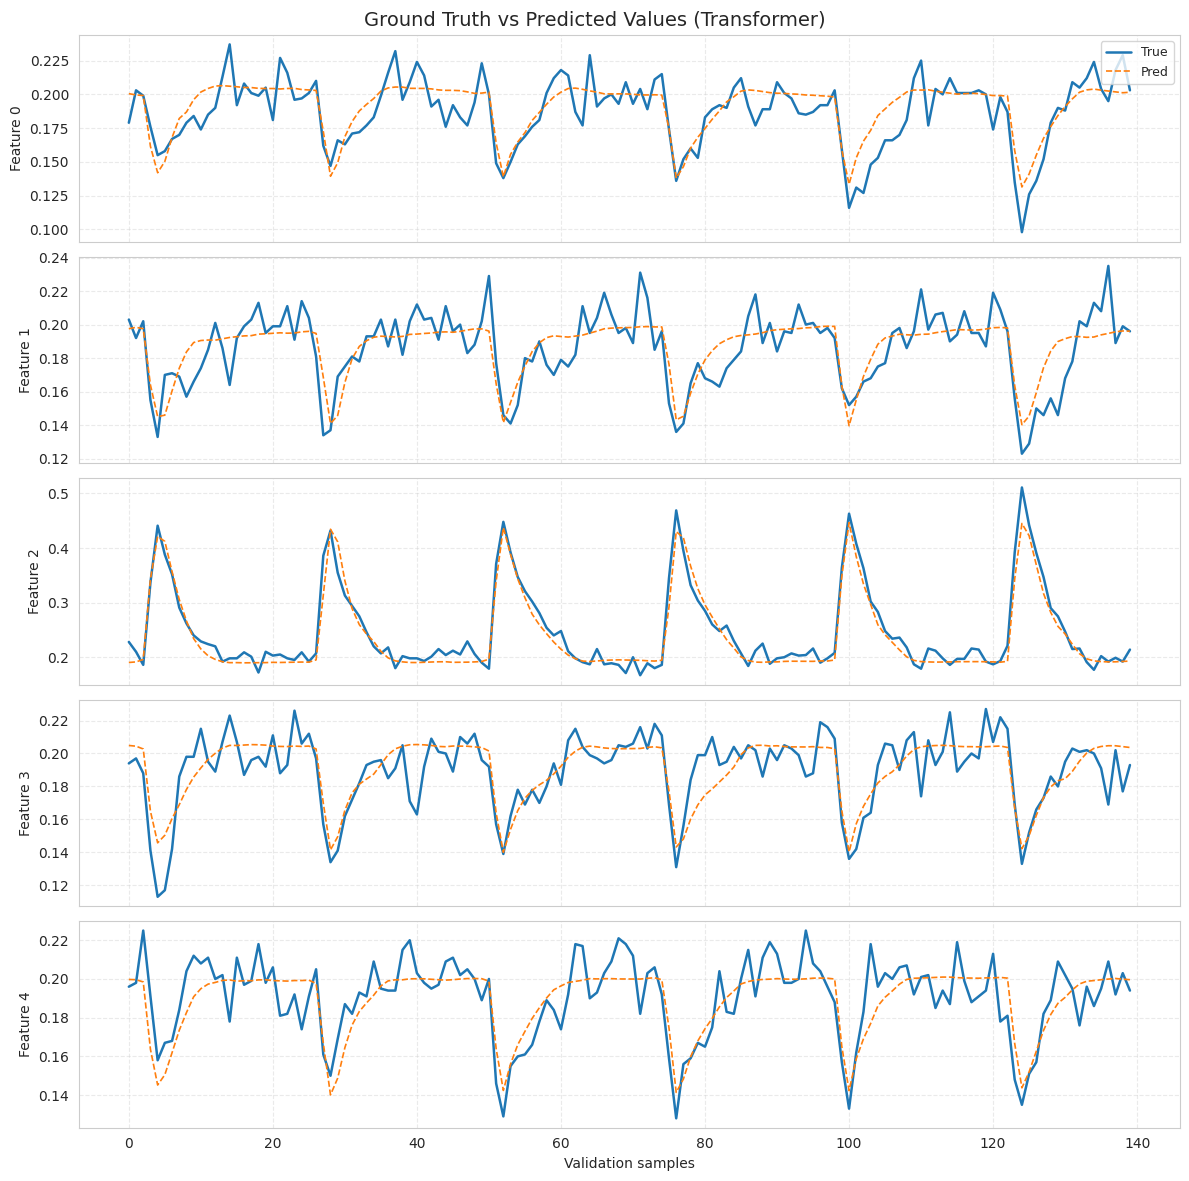


=== Time-series Transformer sweep (sorted) ===
                    name  window  d_model  num_heads  num_layers  ff_dim  dropout  batch  epochs     lr     R2    MSE  val_loss
G_win48_d128_h8_L3_ff256      48      128          8           3     256   0.1000     64      12 0.0010 0.7199 0.0002    0.2889
D_win64_d128_h8_L4_ff256      64      128          8           4     256   0.1000     64      12 0.0008 0.7060 0.0002    0.2999
 H_win32_d64_h8_L4_ff256      32       64          8           4     256   0.1000     64      15 0.0010 0.6994 0.0002    0.3079
 E_win64_d96_h6_L6_ff384      64       96          6           6     384   0.1000     64      12 0.0008 0.6964 0.0002    0.3112
 C_win48_d64_h4_L6_ff256      48       64          4           6     256   0.1000     64      15 0.0008 0.6864 0.0002    0.3226
 A_win32_d64_h4_L4_ff128      32       64          4           4     128   0.1000     64      15 0.0010 0.6713 0.0003    0.3364
 B_win32_d96_h6_L4_ff192      32       96          6    

In [128]:
results = []
models = {}
for cfg in configs:
    print(f"\n=== Running {cfg['name']} ===")
    model, metrics = train_eval_one_config(
        X_train_scaled, y_train_scaled,
        X_test_scaled,  y_test_scaled,
        scaler_y,
        d_model=cfg["d_model"], num_heads=cfg["n_heads"], num_layers=cfg["n_layers"],
        ff_dim=cfg["ff_dim"], dropout=cfg["dropout"], batch_size=cfg["batch_size"],
        epochs=cfg["epochs"], lr=cfg["lr"], plot=True,
        max_pos_len=max(2048, cfg["window"])
    )
    models[cfg["name"]] = model
    results.append({
        "name": cfg["name"],
        "window": cfg["window"],
        "d_model": cfg["d_model"],
        "num_heads": cfg["n_heads"],
        "num_layers": cfg["n_layers"],
        "ff_dim": cfg["ff_dim"],
        "dropout": cfg["dropout"],
        "batch": cfg["batch_size"],
        "epochs": cfg["epochs"],
        "lr": cfg["lr"],
        "R2": metrics["r2"],
        "MSE": metrics["mse"],
        "val_loss": metrics["val_loss"],
    })

df = pd.DataFrame(results).sort_values(["R2","MSE"], ascending=[False, True]).reset_index(drop=True)
print("\n=== Time-series Transformer sweep (sorted) ===")
print(df.to_string(index=False, float_format=lambda x: f"{x:.4f}" if isinstance(x, float) else str(x)))

# --- LaTeX table ---
print("\nLaTeX table:\n")
print(df[["name","window","d_model","num_heads","num_layers","ff_dim","epochs","batch","lr","R2","MSE"]]
      .to_latex(index=False, float_format="%.5f",
                caption="Transformer time-series configurations and validation performance",
                label="tab:ts_transformer_sweep", escape=False))


## 3.3.3 **TODO**

Test 6-8 configurations for various:
* window sizes
* embedding dimensions
* numbers of attention heads
* numbers of transformers layers
* feed-forward network size (dimensfionality of the internal dense layer inside each Transformer block)

Give summary results in a table. Include parameters and  regression scores. Add selected plots (e.g. for the best and worst results).



# Tasks

Write a short report containg the following items. Use plots and tables. Make comments. Deliver as a PDF file.


* Section 3.1.3 Perform sentiment classification using IMDB dataset (35%)
  * Prepare 8 configurations (including various preprocessing parameters).
  * Report results in the table summarizing parameter values and classification results (report accuracy, precision, recall, F1).
  * Display a few reviews from the dataset and print classification result
  * Use Tensorflow or Pytorch library

* Section 3.2.4 Follow the specification (35%)

* Section 3.3.3 Follow the specification (20%)

* Answer the questions (10%)
  1. What is the complexity of attention mechanism with respect to $n$ - the sequence lengths

  2. Is the attention map global or local (pertaining to the sequence).

  3. Which parameters are learned during training the Transformers models for NLP?

  4. What is the role of positional encoding?

  5. Which output data resulting from Transformer Block can be used for classification or regression